In [6]:
# pip install sas7bdat-converter # install sas7bdat-converter to convert sas7bdat file into csv file 
# pip install geopy
# conda install geopandas
# conda install seaborn  -- update seaborn to the latest version

In [2]:
# conda list

## Dataset

- **PISA 2018 results** https://www.oecd.org/pisa/publications/pisa-2018-results.htm
- **School questionnaire data file** https://webfs.oecd.org/pisa2018/SAS_SCH_QQQ.zip
- **Country Classifications by Income** https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html

## Dictionary
**PISA2018_CODEBOOK** https://webfs.oecd.org/pisa2018/PISA2018_CODEBOOK.xlsx


### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sas7bdat_converter # import the package sas7bdat_converter to convert the file
import geopandas as gpd
warnings.filterwarnings('ignore')

### Reading in the datasets and processing the data

In [5]:
 # to_csv(sas7bdat_file, export_file), the pathes and the names, including the file extensions

sas7bdat_converter.to_csv('cy07_msu_sch_qqq.sas7bdat', 'results.csv') 

FileNotFoundError: [Errno 2] No such file or directory: 'cy07_msu_sch_qqq.sas7bdat'

In [5]:
# Read the PISA school dataset

result = pd.read_csv('SCH/results.csv')
result.tail()

,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,ADMINMODE,...,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,M,BOOKID
21898,983.0,QRT,98300802.0,07MS,64300,64387.0,QRT8787,9830000,0.0,2.0,...,0.1964,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN,NaN
21899,983.0,QRT,98300803.0,07MS,64300,64387.0,QRT8787,9830000,0.0,2.0,...,0.6736,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN,NaN
21900,983.0,QRT,98300804.0,07MS,64300,64387.0,QRT8787,9830000,0.0,2.0,...,-1.4551,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN,NaN
21901,983.0,QRT,98300805.0,07MS,64300,64387.0,QRT8787,9830000,0.0,2.0,...,-0.0019,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN,NaN
21902,983.0,QRT,98300806.0,07MS,64300,64387.0,QRT8787,9830000,0.0,2.0,...,-0.1953,0.8915,-0.1791,0.9042,4.17739,207.28298,16.09122,01MAY19:20:24:14,NaN,NaN


In [6]:
# Drop columns
result = result.drop(axis = 0, columns = ['M', 'BOOKID','CYC', 'ADMINMODE', 'Region', 'SUBNATIO', 'NatCen', 'LANGTEST', 'PRIVATESCH'])
result.head()

,CNTRYID,CNT,CNTSCHID,STRATUM,OECD,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,...,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT
0,8.0,ALB,800002.0,ALB0109,0.0,1.0,1.0,95.0,0.0,5.0,...,1.0,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57
1,8.0,ALB,800003.0,ALB0109,0.0,1.0,1.0,NaN,NaN,100.0,...,1.0,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57
2,8.0,ALB,800004.0,ALB0211,0.0,1.0,1.0,100.0,0.0,0.0,...,2.0,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57
3,8.0,ALB,800005.0,ALB0107,0.0,2.0,1.0,100.0,0.0,0.0,...,1.0,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57
4,8.0,ALB,800006.0,ALB0105,0.0,2.0,1.0,100.0,NaN,NaN,...,3.0,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57


In [7]:
# Coverting columns data types from float to int, accoridng to the document

result[['CNTRYID','CNTSCHID', 'OECD','CREACTIV','CLSIZE','SCHSIZE','SC001Q01TA','TOTAT','SC002Q01TA','SC002Q02TA','SC052Q03HA','SCHLTYPE','SC052Q01NA', 'SC052Q02NA']] = result[['CNTRYID','CNTSCHID', 'OECD','CREACTIV','CLSIZE','SCHSIZE','SC001Q01TA','TOTAT','SC002Q01TA','SC002Q02TA','SC052Q03HA','SCHLTYPE','SC052Q01NA', 'SC052Q02NA' ]].apply(np.int64) 

In [8]:
result.head()

,CNTRYID,CNT,CNTSCHID,STRATUM,OECD,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,...,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT
0,8,ALB,800002,ALB0109,0,1,1.0,95.0,0.0,5.0,...,1,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57
1,8,ALB,800003,ALB0109,0,1,1.0,NaN,NaN,100.0,...,1,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57
2,8,ALB,800004,ALB0211,0,1,1.0,100.0,0.0,0.0,...,2,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57
3,8,ALB,800005,ALB0107,0,2,1.0,100.0,0.0,0.0,...,1,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57
4,8,ALB,800006,ALB0105,0,2,1.0,100.0,NaN,NaN,...,3,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57


In [9]:
# check the dataset, including data types, shape and null values

# result.info(verbose = True, show_counts = True) 

In [10]:
# Denote OECD labels

result['OECD'] = result['OECD'].replace({0:'Partner', 1 :'Member'}) 
result.head()

,CNTRYID,CNT,CNTSCHID,STRATUM,OECD,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,...,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT
0,8,ALB,800002,ALB0109,Partner,1,1.0,95.0,0.0,5.0,...,1,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57
1,8,ALB,800003,ALB0109,Partner,1,1.0,NaN,NaN,100.0,...,1,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57
2,8,ALB,800004,ALB0211,Partner,1,1.0,100.0,0.0,0.0,...,2,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57
3,8,ALB,800005,ALB0107,Partner,2,1.0,100.0,0.0,0.0,...,1,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57
4,8,ALB,800006,ALB0105,Partner,2,1.0,100.0,NaN,NaN,...,3,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57


In [11]:
# Add new data points by importing PISA 2018 ranking table

ranking = pd.read_excel('edu-2019-4228-en-t001 copy.xlsx', sheet_name = 'CNTRanking', keep_default_na = True).round(decimals=2)
ranking.head(5)

,CNT,Country,Reading,Mathematics,Science
0,ALB,Albania,405.43,437.22,416.73
1,ARG,Argentina,401.50,379.45,404.07
2,AUS,Australia,502.63,491.36,502.96
3,AUT,Austria,484.39,498.94,489.78
4,QCI,B-S-J-Z (China),555.24,591.39,590.45


In [12]:
# Add more country/region info by beading in new file

country_info = pd.read_csv('worldbank-country-info.csv')
country_info.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [13]:
# Replacing for merging

country_info["CNT"] = country_info['Country Code'].replace({'AZE': "QAZ", 'CHN': "QCI", 'CYP':'QCY', 'XKX':'KSV'})
country_info.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,CNT
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN,ABW
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN,AFE
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN,AFG
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN,AFW
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN,AGO


In [14]:
# Creating pisa_score table by merging in the country info
pisa_score = ranking.merge(country_info, how = 'left', on ='CNT')
pisa_score.head()

,CNT,Country,Reading,Mathematics,Science,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ALB,Albania,405.43,437.22,416.73,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
1,ARG,Argentina,401.50,379.45,404.07,ARG,Latin America & Caribbean,Upper middle income,NaN,Argentina,NaN
2,AUS,Australia,502.63,491.36,502.96,AUS,East Asia & Pacific,High income,Fiscal year end: June 30; reporting period for...,Australia,NaN
3,AUT,Austria,484.39,498.94,489.78,AUT,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Austria,NaN
4,QCI,B-S-J-Z (China),555.24,591.39,590.45,CHN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN


In [15]:
pisa_score.drop([51,52,73,81],inplace = True)

In [16]:
pisa_score.drop(columns=['Country Code', 'SpecialNotes', 'Unnamed: 5', 'Country'], inplace = True)
pisa_score.head()

,CNT,Reading,Mathematics,Science,Region,IncomeGroup,TableName
0,ALB,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
1,ARG,401.50,379.45,404.07,Latin America & Caribbean,Upper middle income,Argentina
2,AUS,502.63,491.36,502.96,East Asia & Pacific,High income,Australia
3,AUT,484.39,498.94,489.78,Europe & Central Asia,High income,Austria
4,QCI,555.24,591.39,590.45,East Asia & Pacific,Upper middle income,China


In [17]:
pisa = pisa_score.rename(columns ={'TableName':'Country'})
pisa.head(5)

,CNT,Reading,Mathematics,Science,Region,IncomeGroup,Country
0,ALB,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
1,ARG,401.50,379.45,404.07,Latin America & Caribbean,Upper middle income,Argentina
2,AUS,502.63,491.36,502.96,East Asia & Pacific,High income,Australia
3,AUT,484.39,498.94,489.78,Europe & Central Asia,High income,Austria
4,QCI,555.24,591.39,590.45,East Asia & Pacific,Upper middle income,China


In [18]:
pisa["Country"] = pisa['Country'].replace({'United States' :'United States of America', 'Korea, Rep.':'South Korea', 'Russian Federation':'Russia', 'Dominican Republic':'Dominican Rep.', 'Brunei Darussalam':'Brunei', 'Czech Republic':'Czechia', 'North Macedonia' :'Macedonia', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'Slovak Republic':'Slovakia'})

In [19]:
pisa.fillna({'Region':'East Asia & Pacific', 'IncomeGroup':'High income', 'Country' :'Taiwan'}, inplace = True)

In [20]:
# Creating table 'x' by extracting columnes 'CNT' and 'OECD' from table 'result'

x = result[['CNT', 'OECD']].drop_duplicates(keep = 'first').reset_index(drop = True)
x.head(5)

,CNT,OECD
0,ALB,Partner
1,QAZ,Partner
2,ARG,Partner
3,AUS,Member
4,AUT,Member


In [21]:
# Creating 'oecd_partner_member_ranking' table by merging 'pisa_score' and 'x'

oecd_ranking = pisa.merge(x, how ='left', on ='CNT').reset_index(drop = True) # Merge datasets to mark the country and respective results with OECD label
oecd_ranking.head()

,CNT,Reading,Mathematics,Science,Region,IncomeGroup,Country,OECD
0,ALB,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania,Partner
1,ARG,401.50,379.45,404.07,Latin America & Caribbean,Upper middle income,Argentina,Partner
2,AUS,502.63,491.36,502.96,East Asia & Pacific,High income,Australia,Member
3,AUT,484.39,498.94,489.78,Europe & Central Asia,High income,Austria,Member
4,QCI,555.24,591.39,590.45,East Asia & Pacific,Upper middle income,China,Partner


In [22]:
oecd_ranking.fillna({'OECD':'Partner'}, inplace = True)

In [23]:
oecd_ranking.head(5)

,CNT,Reading,Mathematics,Science,Region,IncomeGroup,Country,OECD
0,ALB,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania,Partner
1,ARG,401.50,379.45,404.07,Latin America & Caribbean,Upper middle income,Argentina,Partner
2,AUS,502.63,491.36,502.96,East Asia & Pacific,High income,Australia,Member
3,AUT,484.39,498.94,489.78,Europe & Central Asia,High income,Austria,Member
4,QCI,555.24,591.39,590.45,East Asia & Pacific,Upper middle income,China,Partner


In [24]:
# Read the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [25]:
pisa_geo = world.merge(oecd_ranking, how = 'right', left_on ='name', right_on ='Country')
pisa_geo.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,CNT,Reading,Mathematics,Science,Region,IncomeGroup,Country,OECD
0,3.047987e+06,Europe,Albania,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",ALB,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania,Partner
1,4.429329e+07,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",ARG,401.50,379.45,404.07,Latin America & Caribbean,Upper middle income,Argentina,Partner
2,2.323241e+07,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",AUS,502.63,491.36,502.96,East Asia & Pacific,High income,Australia,Member
3,8.754413e+06,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",AUT,484.39,498.94,489.78,Europe & Central Asia,High income,Austria,Member
4,1.379303e+09,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",QCI,555.24,591.39,590.45,East Asia & Pacific,Upper middle income,China,Partner


### Where do these participating nations locate?

Text(0.5, 1.0, 'PISA 2018 Participants')

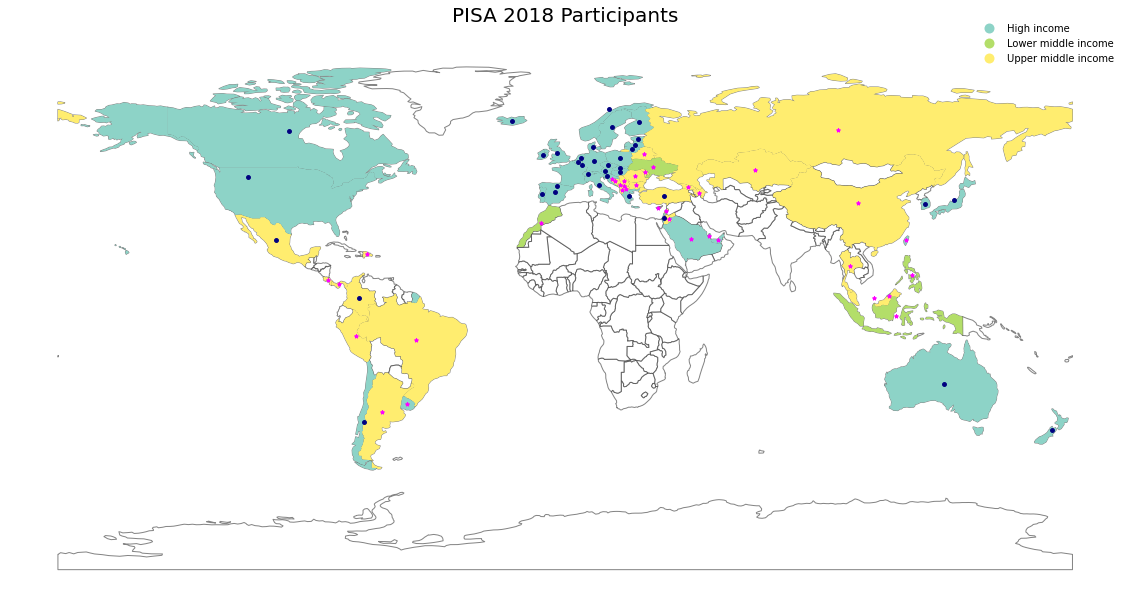

In [26]:
# Visualise the geospatial data

#fig, ax = plt.subplots()
base = world.plot(figsize =(20,20), edgecolor ='0.2', color = 'white', alpha = 0.6)
g = pisa_geo.plot(column = 'IncomeGroup', ax = base,  legend = True, cmap ='Set3', legend_kwds={'bbox_to_anchor':(1, 1.05),'fontsize':10,'frameon':False})
#g = pisa_geo.plot(column = 'IncomeGroup', ax = base,  legend = True, cmap ='Set3', legend_kwds={'loc':'center left','fontsize':12,'frameon':False})
#axis = pisa_geo.plot(column ='OECD', ax = base, legend = True)
pisa_geo[pisa_geo.OECD == 'Member'].centroid.plot(marker='o', ax=base, color='navy', markersize=15)
pisa_geo[pisa_geo.OECD == 'Partner'].centroid.plot(marker='*', ax=base, color='fuchsia', markersize= 15)
g.axis('off')
plt.title('PISA 2018 Participants',pad = 20, fontsize = 20)
#plt.savefig('nation_map.png', dpi = 300)

### How did the students in these countries performe in PISA 2018?

The figure below is an all-in-one-hood histogram to show the distribution of the scores at one glance. 

The original data is from PISA 2018 assessment, in which 80 countries and regions participated to evaluate students' performance in reading, mathematics and science. From the figure, we can see three subjects' scores are normally distributed and slightly left-skewed. We can see there is a tendency for the scores to be rounded to the nearest 5 or 10 points.

Due to the overlapping, it's hard for us to draw clear insights. For better conclusion, we need better visualisation.

Text(0.5, 1.0, 'PISA 2018 Results Distribution')

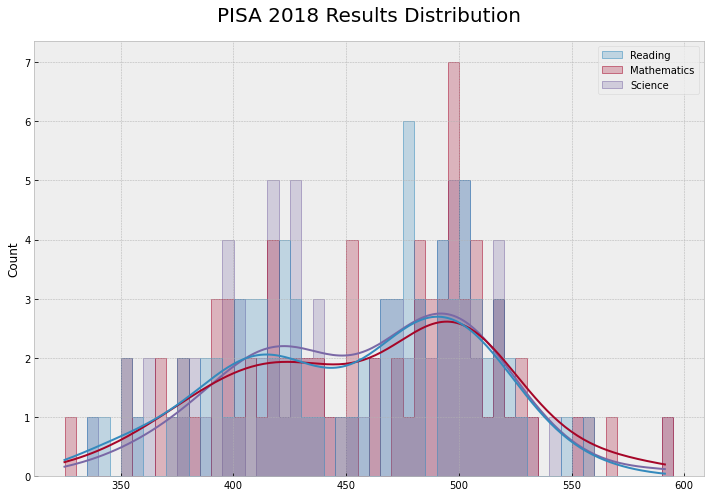

In [27]:
## Visualize the score distribution of all three categories in the all countries

plt.style.use('bmh')
plt.figure(figsize=(12,8))
sns.histplot(data = oecd_ranking, bins = 20, element = 'step', binwidth = 5, kde = True)
plt.title('PISA 2018 Results Distribution',pad = 20, fontsize = 20)
#plt.savefig('results_histgram.png', dpi = 300)

[None, None]

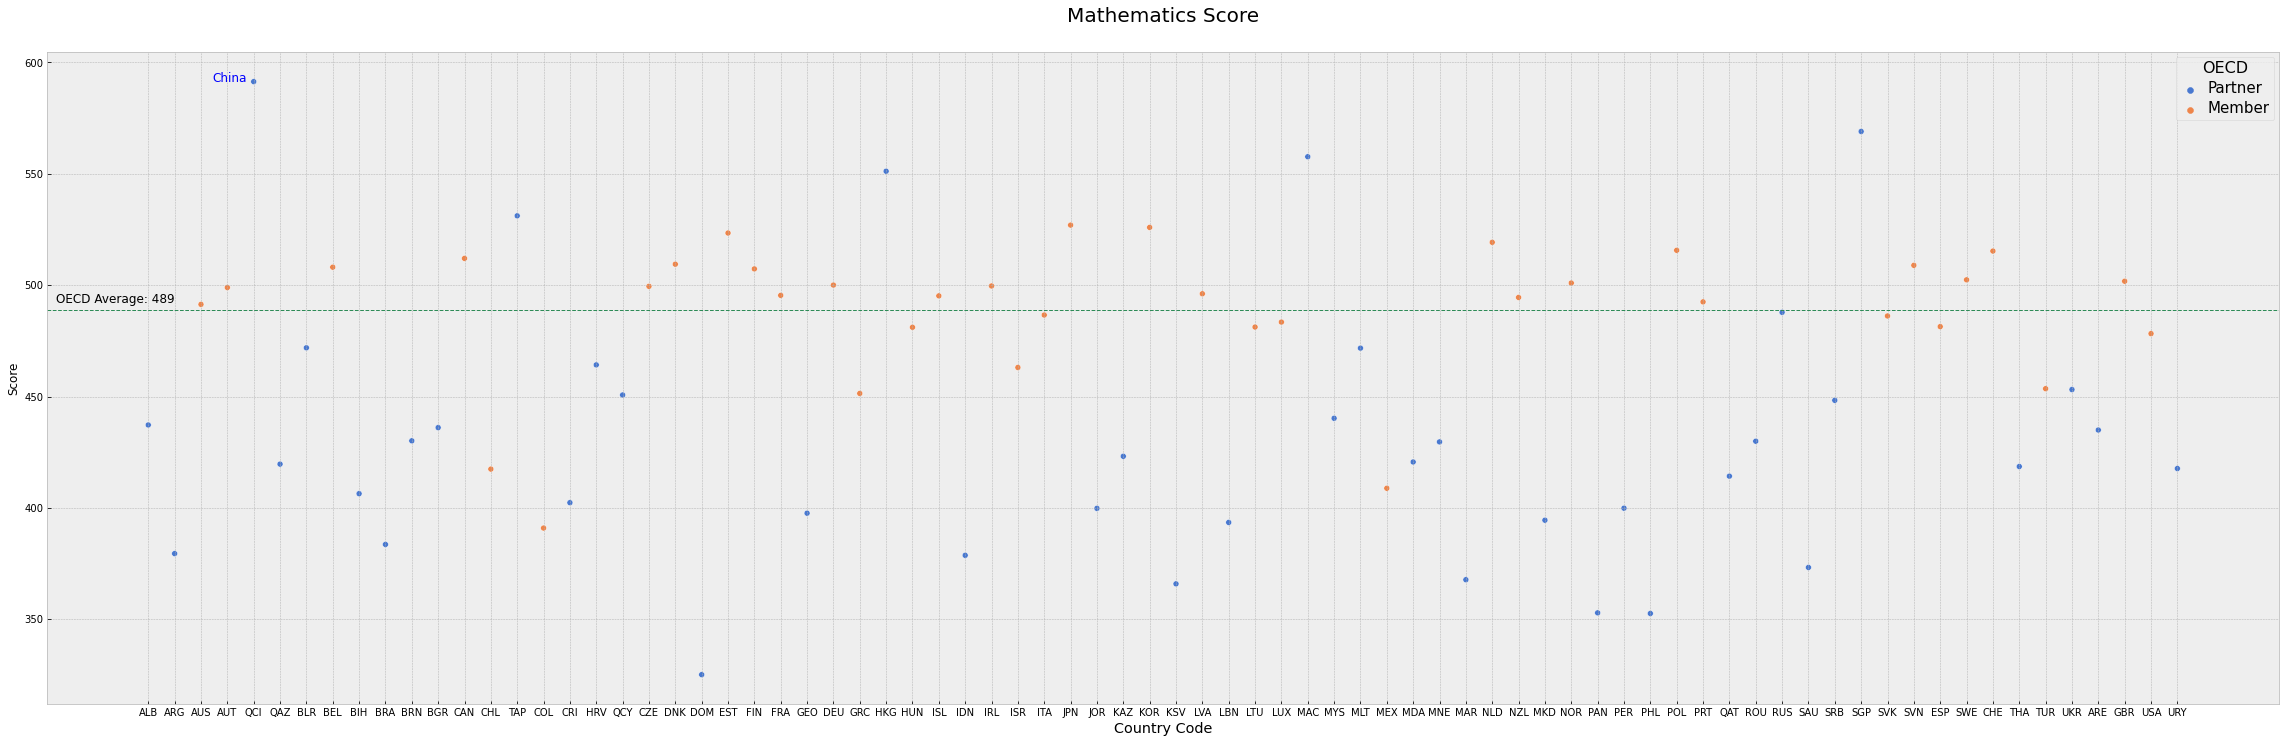

In [28]:
# Visualize individual nations score in single subject

plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(40,12))
graph = sns.scatterplot(data = oecd_ranking, x = 'CNT', y = 'Mathematics', hue = 'OECD', ax = ax, palette = 'muted')
plt.annotate('OECD Average: 489', xy = (1, 492), color ='black', horizontalalignment ='right', xycoords = 'data', fontsize ='large')
plt.title('Mathematics Score', pad =30, fontsize = '20')
plt.ylabel('Score', fontsize = 'large')
plt.xlabel('Country Code', fontsize = 'x-large')
graph.axline(xy1 = (0, 489), slope =0, color ='seagreen', linewidth = 1, linestyle ='dashed')
plt.annotate('China', xy = (3.75, 591.39), color ='blue', horizontalalignment ='right', xycoords = 'data', fontsize ='large')
plt.setp(graph.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')
#plt.savefig('math_dist.png', dpi = 300)

[None, None]

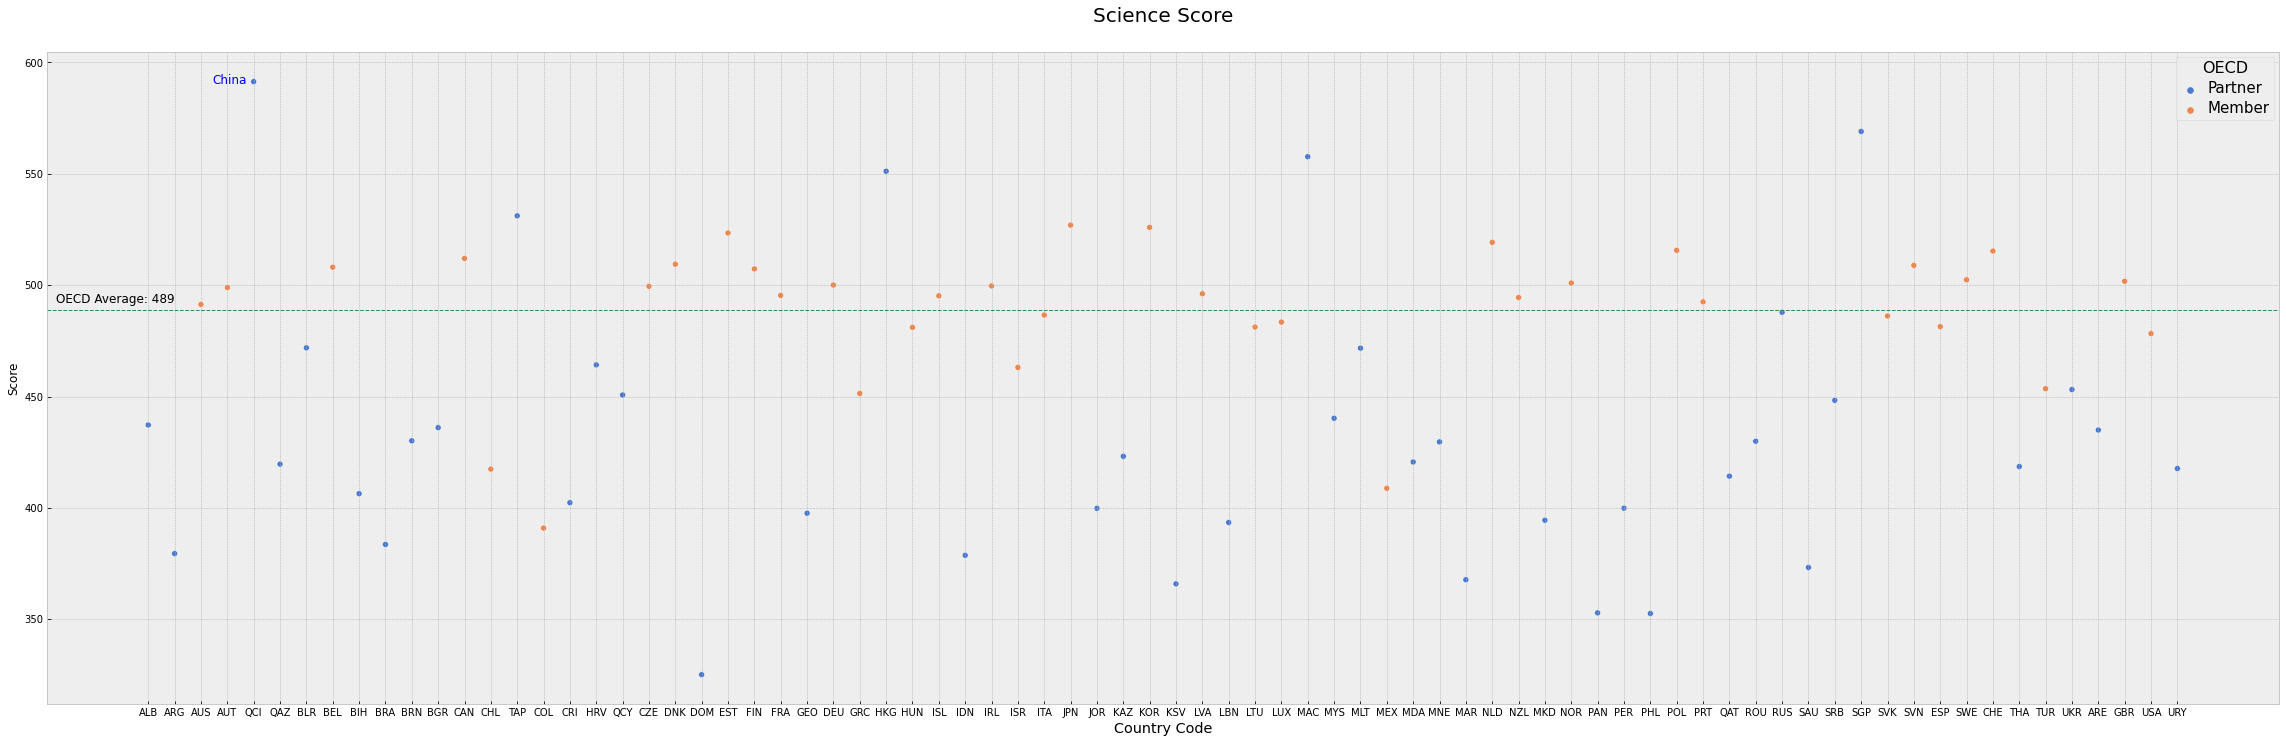

In [29]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(40,12))
graph = sns.scatterplot(data = oecd_ranking, x = 'CNT', y = 'Mathematics', hue = 'OECD', ax = ax, palette = 'muted')
plt.annotate('OECD Average: 489', xy = (1, 492), color ='black', horizontalalignment ='right', xycoords = 'data', fontsize ='large')
plt.title('Science Score', pad =30, fontsize = '20')
plt.ylabel('Score', fontsize = 'large')
plt.xlabel('Country Code', fontsize = 'x-large')
graph.axline(xy1 = (0, 489), slope =0, color ='seagreen', linewidth = 1, linestyle ='dashed')
plt.annotate('China', xy = (3.75, 590.45), color ='blue', horizontalalignment ='right', xycoords = 'data', fontsize ='large')
plt.setp(graph.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')
#plt.savefig('science_dist.png', dpi = 300)

[None, None]

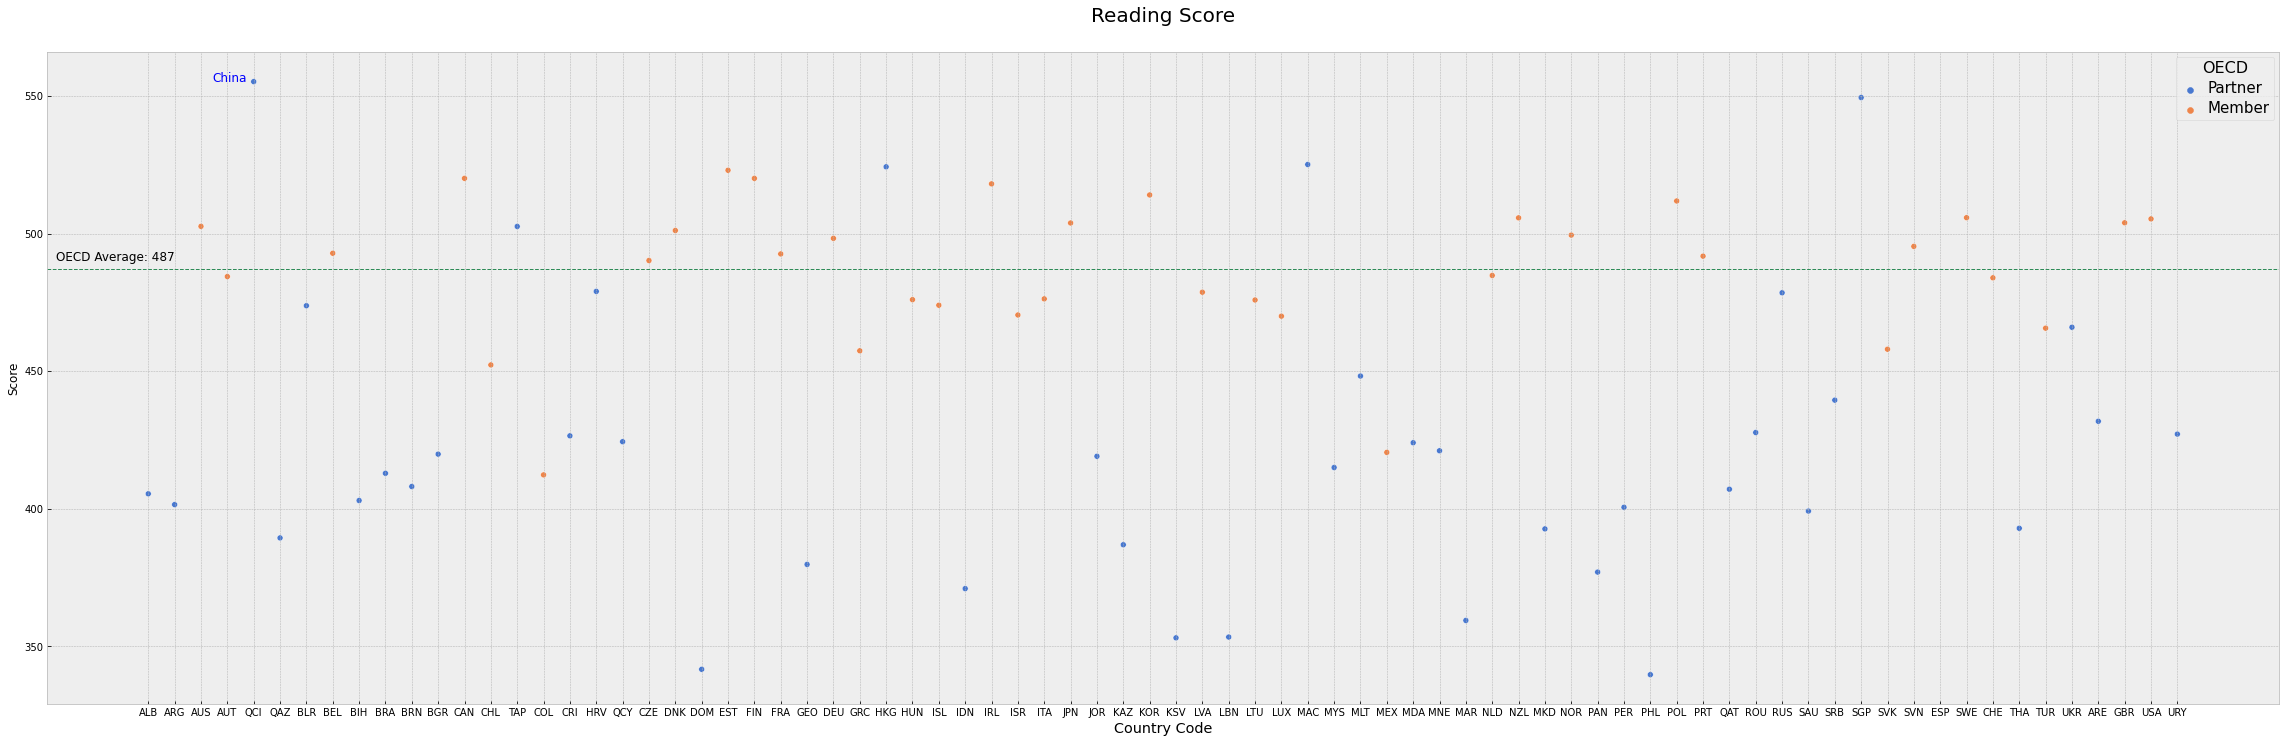

In [30]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(40,12))
graph = sns.scatterplot(data = oecd_ranking, x = 'CNT', y = 'Reading', hue = 'OECD', ax = ax, palette = 'muted')
plt.annotate('OECD Average: 487', xy = (1, 490), color ='black', horizontalalignment ='right', xycoords = 'data', fontsize ='large')
plt.title('Reading Score', pad =30, fontsize = '20')
plt.ylabel('Score', fontsize = 'large')
plt.xlabel('Country Code', fontsize = 'x-large')
graph.axline(xy1 = (0, 487), slope =0, color ='seagreen', linewidth = 1, linestyle ='dashed')
plt.annotate('China', xy = (3.75, 555.24), color ='blue', horizontalalignment ='right', xycoords = 'data', fontsize ='large')
plt.setp(graph.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')
#plt.savefig('reading_dist.png', dpi = 300)

To compare three distributions, we use side-by-side boxplots. Below we compare the distributions of students performance in reading, mathematics and science across all 80 countries. We find: 

- All three subjects' scores are clearly left-skewed. The parts of the boxs to the right of the medians (representing the higher scores) are shorter than the parts to the left of the median (representin the lower scores). This means the lower scores spread wider than the higher scores.
- The medians of three subjects are about at the same level, and the inter-quartile ranges are similar, which suggest that students' performance in the three subjects are balanced.
- Among all three subjects, scores of mathematics differ widest, while reading varies least. 

Overall from the figure, we can suggest global students have developed their knowledge and skills across reading, mathematics and sciecne evenly.

Text(0.5, 1.0, 'Score Stats')

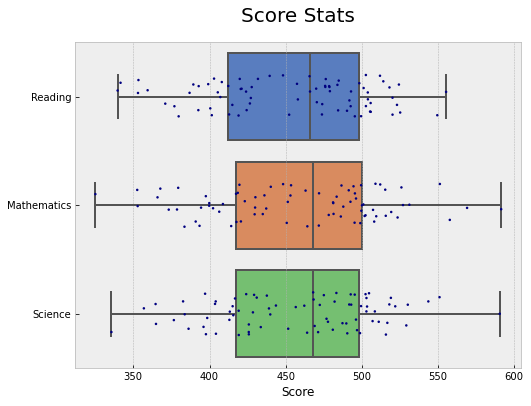

In [31]:
# Visualize all PISA nations' scores in botplot

plt.style.use('bmh')
plt.figure(figsize=(8, 6))
g = sns.boxplot(data = oecd_ranking, palette ='muted', orient = 'h')
g = sns.stripplot(data= oecd_ranking, color="navy", jitter=0.2, size=2.5, orient = 'h')
plt.xlabel('Score')
plt.title('Score Stats', pad = 20, fontsize = '20', loc ='center')
#plt.savefig('score_stats.png', dpi = 300)

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.

From the earlier research, we know the PISA 2018 assessment participants include both OECD member countries/regions and non-OECD countries/regions. To see the comparision between the particpants, we partition the data into categories, and construct side-by-side boxplots of assessment score distribution within each category.

<Figure size 864x432 with 0 Axes>

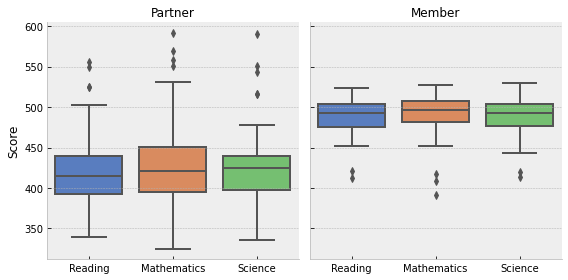

In [32]:
# Visualize scores in OECD and non-OECD

plt.style.use('bmh')
#plt.style.use('default')
plt.figure(figsize=(12, 6))
g= sns.catplot(data = oecd_ranking, kind = 'box', height = 4, palette = 'muted', col = 'OECD', sharex = True, sharey = True) #, margin_titles = False)
g.set_axis_labels("", 'Score', size = 12)
plt.tight_layout()
g.set_titles("{col_name}")
#plt.savefig('score_oecd_label', dpi =300)

From the figure above, we discover:
- Overall students from OECD countries/regions perform better than students from non-OECD countries/regions. The median of non-OECD group is very below the median of the OECD-group.
- There are gaps of students' performance between OECD countries/regions and non-OECD countries/regions. The majority (inter-quartile range plus lower quartile) of scores of non-OECD participants in three subjects are below the corresponding OECD particpants' lower whiskers. It indicates a notable inequality.
- OECD and non-OECD participants show a similar tendency which scores spread out symmetrically in line with the medians in all three subjects. The median of science score of OECD participants is slightly above the center.
- Given the spreadness, on the left side of the figure, OECD countries/regions, all three box plots are comparatively short. This suggests that overall students have a close score with each other in each subject. On the contrast, the students from non-OECD group perform differently with each other in each subject.

Outside of the upper whiskers and lower whiskers, outlies bring up new thoughts:
- Although outliers in the OECD group are below the lower whiskers, they are still among the non-OECD group's inter-quartile range, which suggest it's vital to reinforce the education in non-OECD countries/regions to reduce the gap.
- All the extremly high scores in three assessed subjects occur in the non-OECD group while the whole group's general performance is poor. It shows even in the non-OECD group, students from certain countries/region are very competent and competitive.

We suspect that the PISA assessment results are corresponding to the participant countries' and regions' economic status. To see the comparision between the particpants, we partition the data into 'IncomeGroup' strata, and construct side-by-side boxplots of assessment score distribution within each stratum.

<Figure size 864x432 with 0 Axes>

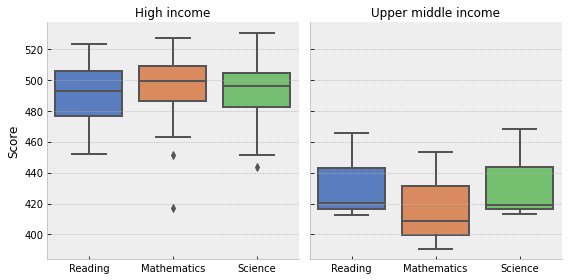

In [33]:
# Visualize socres regarding income in OECD

plt.style.use('bmh')
#plt.style.use('default')
plt.figure(figsize=(12, 6))
g= sns.catplot(data = oecd_ranking[oecd_ranking.OECD =='Member'], kind = 'box', height = 4, palette = 'muted', col = 'IncomeGroup', sharex = True, sharey = True) #, margin_titles = False)
g.set_axis_labels("", 'Score', size = 12)
plt.tight_layout()
g.set_titles("{col_name}")
#plt.savefig('score_oecd_income', dpi =300)

<Figure size 864x432 with 0 Axes>

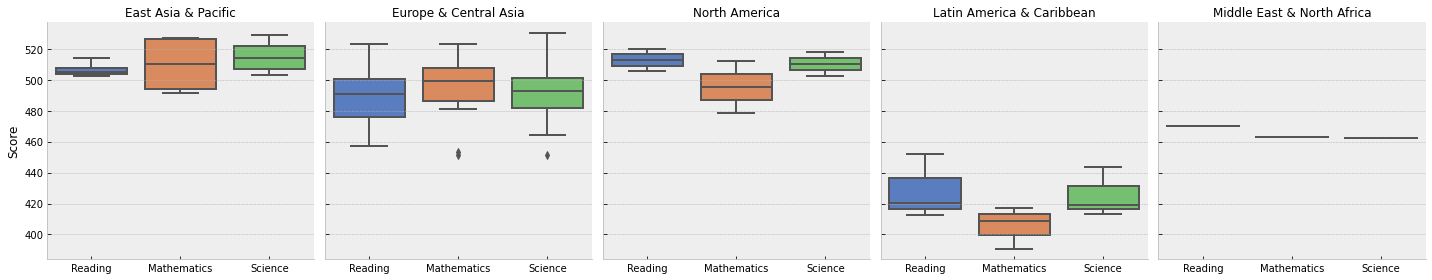

In [34]:
# Visualize scores regarding regions in OECD

plt.style.use('bmh')
#plt.style.use('default')
plt.figure(figsize=(12, 6))
g= sns.catplot(data = oecd_ranking[(oecd_ranking.OECD =='Member')], kind = 'box', height = 4, palette = 'muted', col = 'Region', sharex = True, sharey = True) #, margin_titles = False)
g.set_axis_labels("", 'Score', size = 12)
plt.tight_layout()
g.set_titles("{col_name}")
#plt.savefig('score_oecd_region.png', dpi =300)

<Figure size 864x432 with 0 Axes>

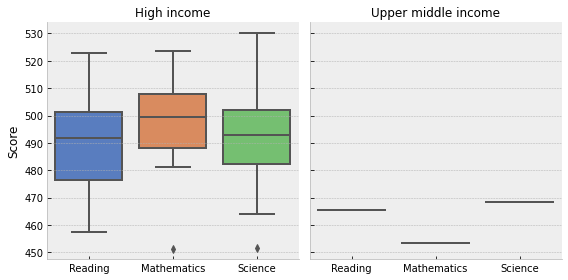

In [35]:
# Visualize scores regarding income in European OECD countries

plt.style.use('bmh')
#plt.style.use('default')
plt.figure(figsize=(12, 6))
g= sns.catplot(data = oecd_ranking[(oecd_ranking.OECD =='Member')& (oecd_ranking.Region =='Europe & Central Asia')], kind = 'box', height = 4, palette = 'muted', col = 'IncomeGroup', sharex = True, sharey = True) #, margin_titles = False)
g.set_axis_labels("", 'Score', size = 12)
g.set_titles("{col_name}")
plt.tight_layout()
#plt.savefig('score_oecd_europe.png', dpi =300)

<Figure size 864x432 with 0 Axes>

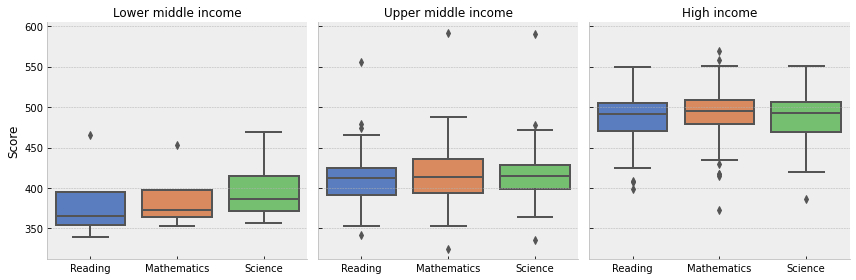

In [36]:
# Visualize scores regarding income in all PISA assessment participants

plt.style.use('bmh')
plt.figure(figsize=(12, 6))
g = sns.catplot(data = oecd_ranking, kind = 'box', height = 4, palette = 'muted', col = 'IncomeGroup', sharex = True, sharey = True, margin_titles = False, col_order = ['Lower middle income', 'Upper middle income', 'High income'])
g.set_titles("{col_name}")
g.set_axis_labels("", 'Score')
plt.tight_layout()
#plt.savefig('score_dist_income.png', dpi = 300)

<Figure size 864x432 with 0 Axes>

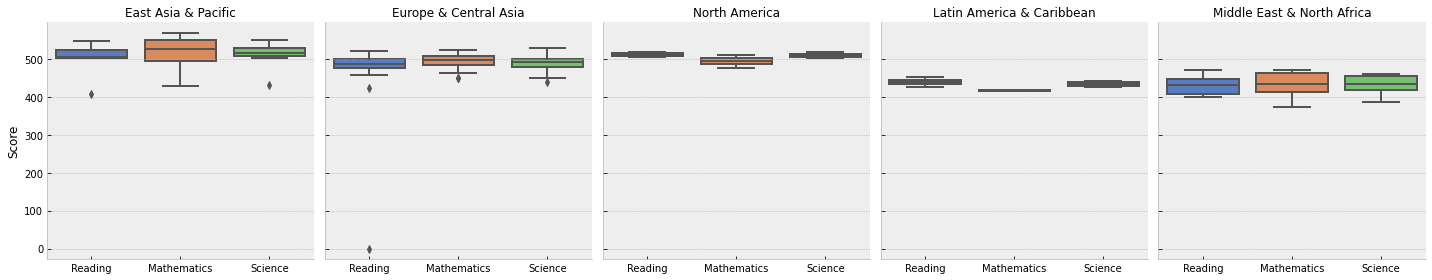

In [37]:
# Visualize scores regarding region in all high-income PISA assessment participants

plt.style.use('bmh')
plt.figure(figsize=(12, 6))
g = sns.catplot(data = oecd_ranking[(oecd_ranking.IncomeGroup =='High income')].fillna(0), kind = 'box', height = 4, palette = 'muted', col = 'Region', sharex = True, sharey = True, margin_titles = False, col_order= ['East Asia & Pacific', 'Europe & Central Asia', 'North America', 'Latin America & Caribbean', 'Middle East & North Africa'])
g.set_titles("{col_name}")
g.set_axis_labels("", 'Score')
plt.tight_layout()
#plt.savefig('highincome_region.png', dpi = 300)

<Figure size 864x432 with 0 Axes>

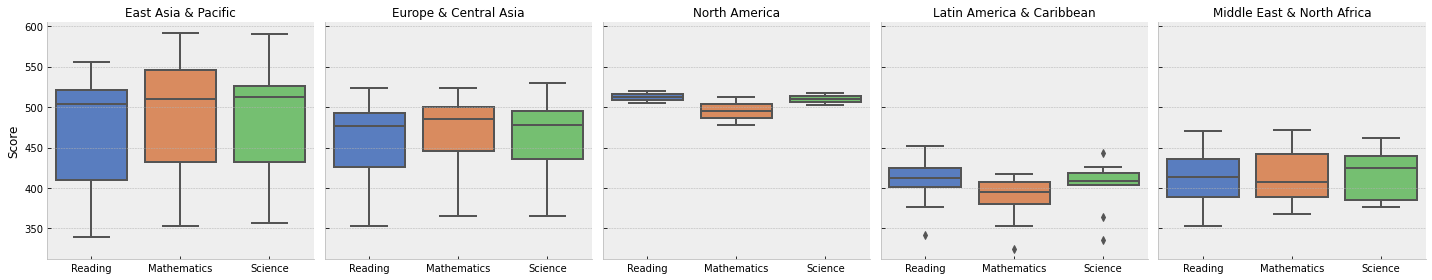

In [38]:
# Visualize scores regarding region in all PISA assessment participants

plt.figure(figsize=(12, 6))
g = sns.catplot(data = oecd_ranking, kind = 'box', height = 4, palette = 'muted', col = 'Region', sharex = True, sharey = True, margin_titles = False, col_order= ['East Asia & Pacific', 'Europe & Central Asia', 'North America', 'Latin America & Caribbean', 'Middle East & North Africa'] )
g.set_axis_labels("", 'Score')
g.set_titles("{col_name}")
plt.tight_layout()
#plt.savefig('all_region.png', dpi = 300)

## What are these participating schools?

In [39]:
# Construct a school table to investigate the conditions of schools

In [40]:
school = result[['CNT','OECD','CNTSCHID','SC001Q01TA', 'SCHLTYPE', 'STRATIO', 'SCHSIZE','SC002Q01TA','SC002Q02TA', 'SC052Q03HA', 'RATCMP1', 'RATCMP2', 'TOTAT', 'PROATCE', 'PROAT5AB', 'PROAT5AM', 'PROAT6', 'CLSIZE', 'SC052Q01NA', 'SC052Q02NA']]

In [41]:
school.shape

(21903, 20)

In [42]:
schools = school.rename(columns = {'SC001Q01TA':'CitySize', 'SCHLTYPE':'SchoolType', 'SCHSIZE' :'SchoolSize','SC002Q01TA':'NumBoys','SC002Q02TA':'NumGirls', 'STRATIO':'StudentTeacherRatio', 'SC052Q03HA':'Tutoring', 'RATCMP1':'ComputerPerStudent', 'RATCMP2':'ComputerWithInternet', 'TOTAT':'SumTeachers', 'PROATCE':'FullyCert', 'PROAT5AB':'BachelorDegree','PROAT5AM':'MasterDegree', 'PROAT6':'level-6', 'CLSIZE':'ClassSize', 'SC052Q01NA':'StudyRoom', 'SC052Q02NA':'StaffHelp'})
schools.head()

,CNT,OECD,CNTSCHID,CitySize,SchoolType,StudentTeacherRatio,SchoolSize,NumBoys,NumGirls,Tutoring,ComputerPerStudent,ComputerWithInternet,SumTeachers,FullyCert,BachelorDegree,MasterDegree,level-6,ClassSize,StudyRoom,StaffHelp
0,ALB,Partner,800002,1,3,NaN,0,0,0,2,NaN,0.0000,26,0.0000,0.0000,0.1154,0.0,18,2,2
1,ALB,Partner,800003,1,3,NaN,0,0,0,2,NaN,NaN,6,1.0000,0.3333,0.3333,0.0,13,2,2
2,ALB,Partner,800004,1,3,9.7619,205,109,96,1,0.0000,NaN,21,1.0000,0.5238,0.4762,0.0,18,1,1
3,ALB,Partner,800005,2,3,NaN,0,0,0,1,NaN,0.3333,34,0.6087,0.3623,0.6377,0.0,23,2,1
4,ALB,Partner,800006,2,3,18.0000,315,175,140,1,0.0256,1.0000,17,1.0000,0.0000,0.1714,0.0,38,2,2


In [43]:
# Denote 'City Size', 'School Type','Tutoring' and 'After-school' with labels for better understanding

In [44]:
schools['CitySize'] = schools['CitySize'].replace({1:'Village',2:'Small town',3:'Town', 4:'City', 5:'Large city', 0: 'Missing'})
schools['SchoolType'] = schools['SchoolType'].replace({1 : 'Private Independent', 2:'Private Gov-dependent', 3:'Public', 0:'Missing'})
schools['Tutoring'] = schools['Tutoring'].replace({1:'Yes', 2: 'No', 0: 'Missing'})
schools['StudyRoom'] = schools['StudyRoom'].replace({1:'Yes', 2: 'No', 0: 'Missing'})
schools['StaffHelp'] = schools['StaffHelp'].replace({1:'Yes', 2: 'No', 0: 'Missing'})
schools.head()

,CNT,OECD,CNTSCHID,CitySize,SchoolType,StudentTeacherRatio,SchoolSize,NumBoys,NumGirls,Tutoring,ComputerPerStudent,ComputerWithInternet,SumTeachers,FullyCert,BachelorDegree,MasterDegree,level-6,ClassSize,StudyRoom,StaffHelp
0,ALB,Partner,800002,Village,Public,NaN,0,0,0,No,NaN,0.0000,26,0.0000,0.0000,0.1154,0.0,18,No,No
1,ALB,Partner,800003,Village,Public,NaN,0,0,0,No,NaN,NaN,6,1.0000,0.3333,0.3333,0.0,13,No,No
2,ALB,Partner,800004,Village,Public,9.7619,205,109,96,Yes,0.0000,NaN,21,1.0000,0.5238,0.4762,0.0,18,Yes,Yes
3,ALB,Partner,800005,Small town,Public,NaN,0,0,0,Yes,NaN,0.3333,34,0.6087,0.3623,0.6377,0.0,23,No,Yes
4,ALB,Partner,800006,Small town,Public,18.0000,315,175,140,Yes,0.0256,1.0000,17,1.0000,0.0000,0.1714,0.0,38,No,No


In [45]:
school_info = schools.merge(pisa, on = 'CNT', how = 'outer')
school_info.tail()

,CNT,OECD,CNTSCHID,CitySize,SchoolType,StudentTeacherRatio,SchoolSize,NumBoys,NumGirls,Tutoring,...,level-6,ClassSize,StudyRoom,StaffHelp,Reading,Mathematics,Science,Region,IncomeGroup,Country
21899,QRT,Partner,98300803.0,Village,Public,1.6923,11.0,6.0,5.0,Yes,...,0.0,13.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN
21900,QRT,Partner,98300804.0,Village,Public,5.1034,74.0,40.0,34.0,Yes,...,0.0,13.0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN
21901,QRT,Partner,98300805.0,Village,Public,4.5833,55.0,33.0,22.0,Yes,...,0.0,13.0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
21902,QRT,Partner,98300806.0,City,Public,13.9333,627.0,302.0,325.0,Yes,...,0.0,23.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN
21903,QCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,424.36,450.68,439.01,Europe & Central Asia,High income,Cyprus


In [46]:
# Convert datatypes to the original datatypes

school_info[['CNTSCHID', 'SchoolSize', 'NumBoys', 'NumGirls', 'ClassSize']] = school_info[['CNTSCHID', 'SchoolSize', 'NumBoys', 'NumGirls', 'ClassSize']].apply(np.int64) 
school_info.head()

,CNT,OECD,CNTSCHID,CitySize,SchoolType,StudentTeacherRatio,SchoolSize,NumBoys,NumGirls,Tutoring,...,level-6,ClassSize,StudyRoom,StaffHelp,Reading,Mathematics,Science,Region,IncomeGroup,Country
0,ALB,Partner,800002,Village,Public,NaN,0,0,0,No,...,0.0,18,No,No,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
1,ALB,Partner,800003,Village,Public,NaN,0,0,0,No,...,0.0,13,No,No,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
2,ALB,Partner,800004,Village,Public,9.7619,205,109,96,Yes,...,0.0,18,Yes,Yes,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
3,ALB,Partner,800005,Small town,Public,NaN,0,0,0,Yes,...,0.0,23,No,Yes,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
4,ALB,Partner,800006,Small town,Public,18.0000,315,175,140,Yes,...,0.0,38,No,No,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania


In [47]:
school_info.drop(columns = ['Reading', 'Mathematics', 'Science']).head()

,CNT,OECD,CNTSCHID,CitySize,SchoolType,StudentTeacherRatio,SchoolSize,NumBoys,NumGirls,Tutoring,...,FullyCert,BachelorDegree,MasterDegree,level-6,ClassSize,StudyRoom,StaffHelp,Region,IncomeGroup,Country
0,ALB,Partner,800002,Village,Public,NaN,0,0,0,No,...,0.0000,0.0000,0.1154,0.0,18,No,No,Europe & Central Asia,Upper middle income,Albania
1,ALB,Partner,800003,Village,Public,NaN,0,0,0,No,...,1.0000,0.3333,0.3333,0.0,13,No,No,Europe & Central Asia,Upper middle income,Albania
2,ALB,Partner,800004,Village,Public,9.7619,205,109,96,Yes,...,1.0000,0.5238,0.4762,0.0,18,Yes,Yes,Europe & Central Asia,Upper middle income,Albania
3,ALB,Partner,800005,Small town,Public,NaN,0,0,0,Yes,...,0.6087,0.3623,0.6377,0.0,23,No,Yes,Europe & Central Asia,Upper middle income,Albania
4,ALB,Partner,800006,Small town,Public,18.0000,315,175,140,Yes,...,1.0000,0.0000,0.1714,0.0,38,No,No,Europe & Central Asia,Upper middle income,Albania


In [48]:
schools_info = school_info.drop(school_info[(school_info.CNT == 'QCY') | (school_info.CNT == 'VNM')].index).reset_index()
schools_info.head()

,index,CNT,OECD,CNTSCHID,CitySize,SchoolType,StudentTeacherRatio,SchoolSize,NumBoys,NumGirls,...,level-6,ClassSize,StudyRoom,StaffHelp,Reading,Mathematics,Science,Region,IncomeGroup,Country
0,0,ALB,Partner,800002,Village,Public,NaN,0,0,0,...,0.0,18,No,No,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
1,1,ALB,Partner,800003,Village,Public,NaN,0,0,0,...,0.0,13,No,No,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
2,2,ALB,Partner,800004,Village,Public,9.7619,205,109,96,...,0.0,18,Yes,Yes,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
3,3,ALB,Partner,800005,Small town,Public,NaN,0,0,0,...,0.0,23,No,Yes,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania
4,4,ALB,Partner,800006,Small town,Public,18.0000,315,175,140,...,0.0,38,No,No,405.43,437.22,416.73,Europe & Central Asia,Upper middle income,Albania


In [49]:
school_types_nomissing = schools_info.drop(schools_info[(schools_info.SchoolType == 'Missing')].index).reset_index()

### What kinds of schools do students attend, public or private?

<Figure size 800x500 with 0 Axes>

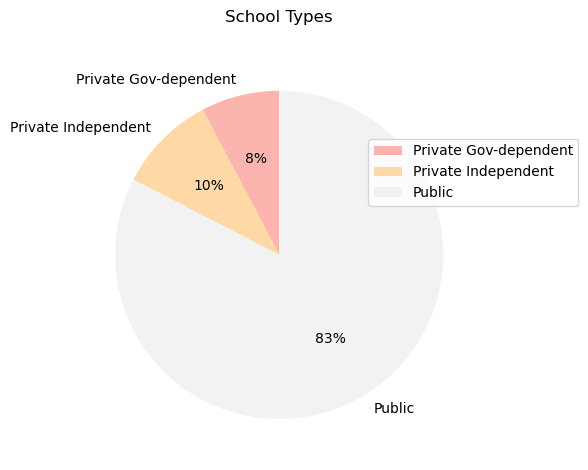

In [50]:
# Visualize all schools regarding schooltype

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
df = school_types_nomissing.groupby('SchoolType').CNTSCHID.count().reset_index()
df.plot.pie(y ='CNTSCHID', startangle = 90, autopct = '%1.0f%%', labels = ['Private Gov-dependent', 'Private Independent', 'Public'],  colormap = 'Pastel1')
plt.legend(loc = 'best', bbox_to_anchor=(0.7, 0.8))
plt.title('School Types',pad = 20)
plt.ylabel('')
plt.tight_layout()
#plt.savefig('schooltypes_all.png', dpi = 300)

In [51]:
# Visualize school types in all participating nations


plt.style.use('default')
plt.figure(figsize = (20, 35), dpi = 300)
plt.tight_layout()
plot = school_types_nomissing.groupby('Country')['SchoolType'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
g = sns.histplot(y='Country', hue ='SchoolType', weights ='percentage', multiple ='stack', data = plot, palette ='magma_r', element = 'bars', legend = True, shrink = 0.8, hue_order = ['Private Independent', 'Private Gov-dependent', 'Public']) 
plt.xlabel('Count in %')
plt.title('Different Types of Schools in Every Nation',pad = 20)
plt.setp(g.get_legend().get_texts(), fontsize ='12')
plt.setp(g.get_legend().get_title(), fontsize='15')
plt.tight_layout()
#plt.savefig('school_type_dist.png', dpi = 300)

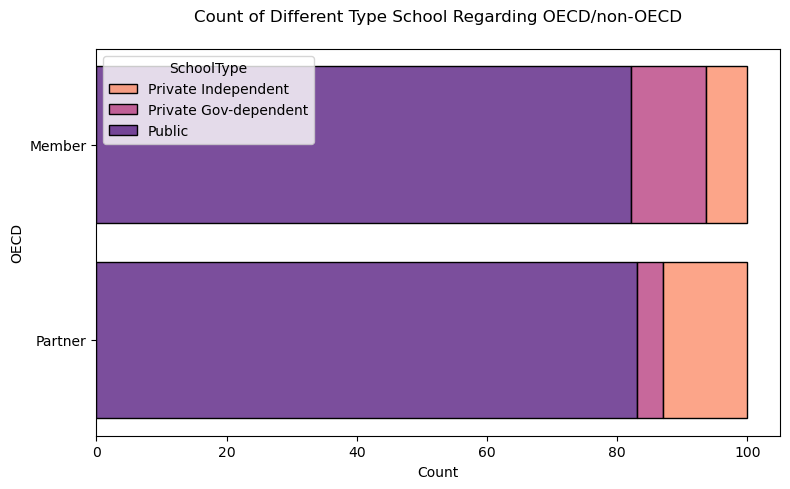

In [52]:
# Visualize school types among OECD and non-OECD

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = school_types_nomissing.groupby('OECD')['SchoolType'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='OECD', hue ='SchoolType', weights ='percentage', multiple ='stack', data = plot, palette ='magma_r', element = 'bars', shrink = 0.8, hue_order = ['Private Independent', 'Private Gov-dependent', 'Public'])
plt.title('Count of Different Type School Regarding OECD/non-OECD',pad = 20)
plt.tight_layout()
#plt.savefig('school_type_oecd.png', dpi = 300)

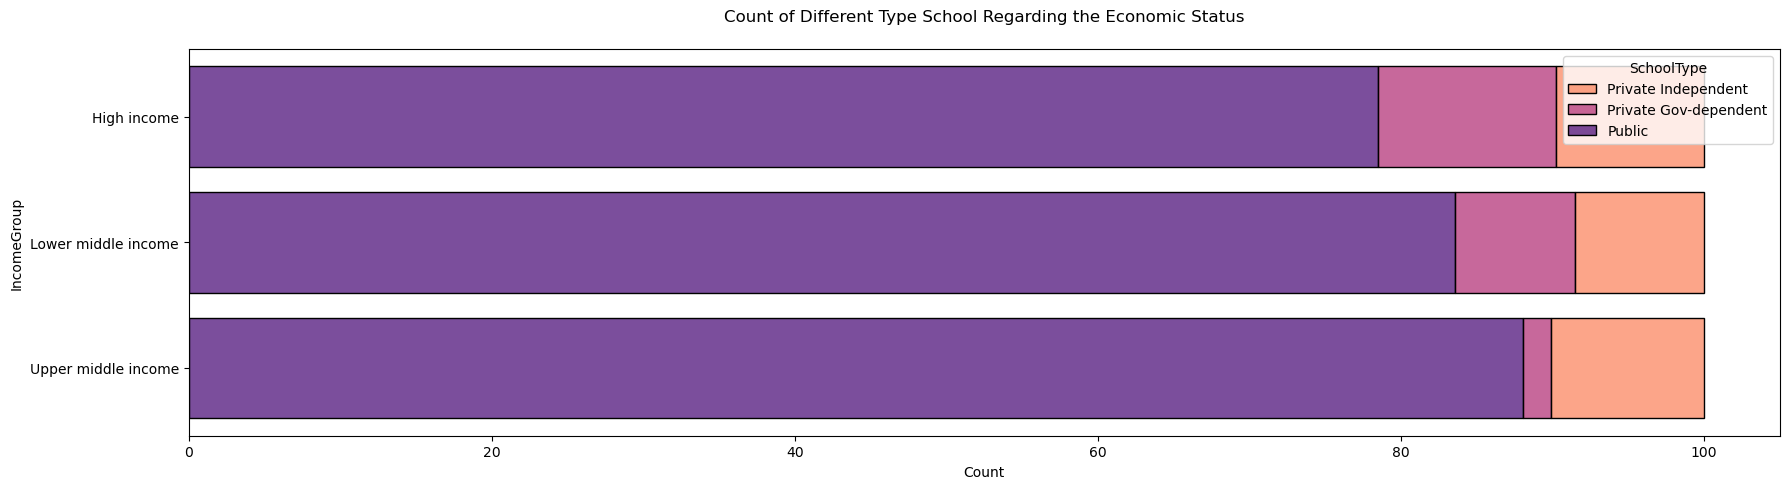

In [53]:
# Visualize the school types regarding income

plt.style.use('default')
plt.figure(figsize = (18, 5))
plt.tight_layout()
plot = school_types_nomissing.groupby('IncomeGroup')['SchoolType'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='IncomeGroup', hue ='SchoolType', weights ='percentage', multiple ='stack', data = plot, palette ='magma_r', element = 'bars', shrink = 0.8, hue_order = ['Private Independent', 'Private Gov-dependent', 'Public']) #, cat_order = ['High income', 'Upper middle income', 'Lower middle income'])
plt.title('Count of Different Type School Regarding the Economic Status',pad = 20)
plt.tight_layout()
#plt.savefig('school_type_income.png', dpi = 300)

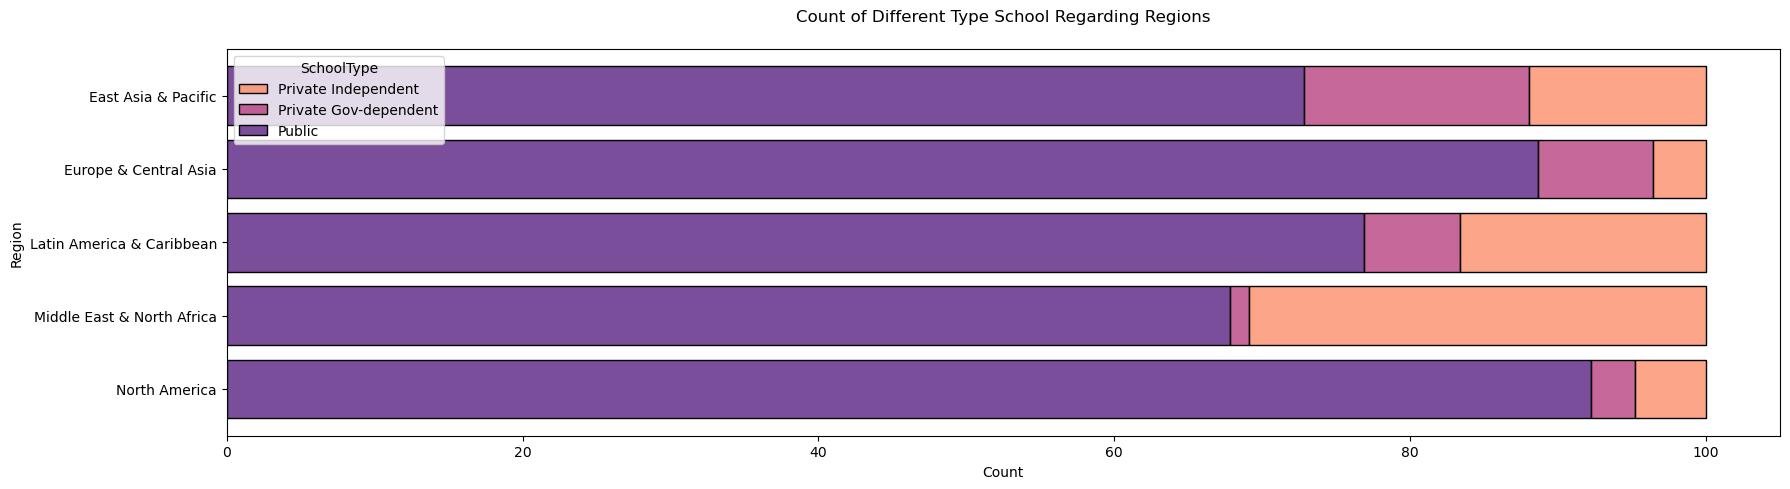

In [54]:
# Visualize school types regarding regions

plt.style.use('default')
plt.figure(figsize = (18, 5))
plt.tight_layout()
plot = school_types_nomissing.groupby('Region')['SchoolType'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='Region', hue ='SchoolType', weights ='percentage', multiple ='stack', data = plot, palette ='magma_r', element = 'bars', shrink = 0.8, hue_order = ['Private Independent', 'Private Gov-dependent', 'Public'])
plt.title('Count of Different Type School Regarding Regions',pad = 20)
plt.tight_layout()
#plt.savefig('school_type_region.png', dpi = 300)

In [55]:
citysize_nomissing = schools_info.drop(schools_info[(schools_info.CitySize == 'Missing')].index).reset_index()

Text(0.5, 0, 'Count in %')

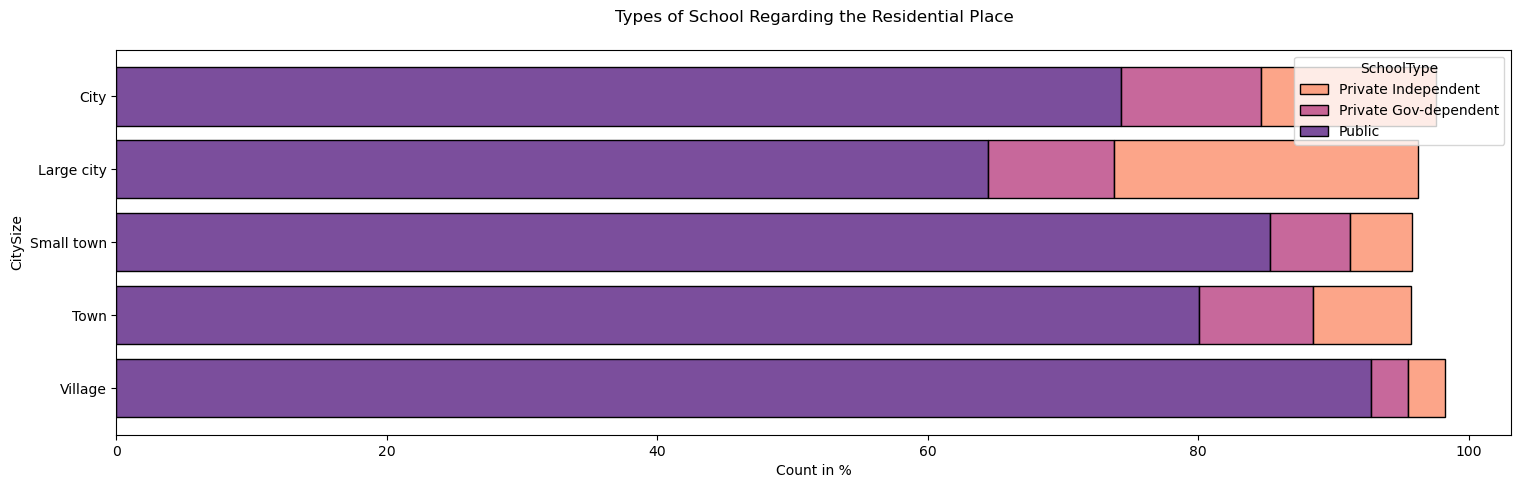

In [56]:
# Visualize school types regarding city sizes

plt.style.use('default')
plt.figure(figsize = (18, 5))
plt.tight_layout()
plot = citysize_nomissing.groupby('CitySize')['SchoolType'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='CitySize', hue ='SchoolType', weights ='percentage', multiple ='stack', data = plot, palette ='magma_r', element = 'bars', shrink = 0.8, hue_order = ['Private Independent', 'Private Gov-dependent', 'Public'])
plt.title('Types of School Regarding the Residential Place',pad = 20)
plt.xlabel('Count in %')
#plt.savefig('city_schoolsize.png', dpi = 300)

### Have schools provided adequate learning aid for students to support their development?

#### After-school tutoring

In [57]:
tutoring_nomissing = schools_info.drop(schools_info[(schools_info.StaffHelp == 'Missing')].index).reset_index()

Text(0, 0.5, '')

<Figure size 800x500 with 0 Axes>

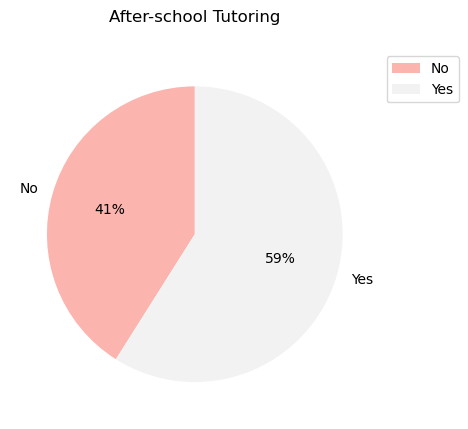

In [58]:
# Visualize after-school tutoring in all schools

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
df = tutoring_nomissing.groupby('StaffHelp').CNTSCHID.count().reset_index()
df.plot.pie(y ='CNTSCHID', startangle = 90, labels = ['No', 'Yes'], autopct = '%1.0f%%', colormap = 'Pastel1')
plt.title('After-school Tutoring',pad = 20)
plt.legend(loc = 'best', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
#plt.savefig('after-school-tutoring-all.png', dpi = 300)

In [59]:
schooltype_tutoring = schools_info.drop(schools_info[(schools_info.SchoolType == 'Missing') | (schools_info.StaffHelp == 'Missing')].index).reset_index()

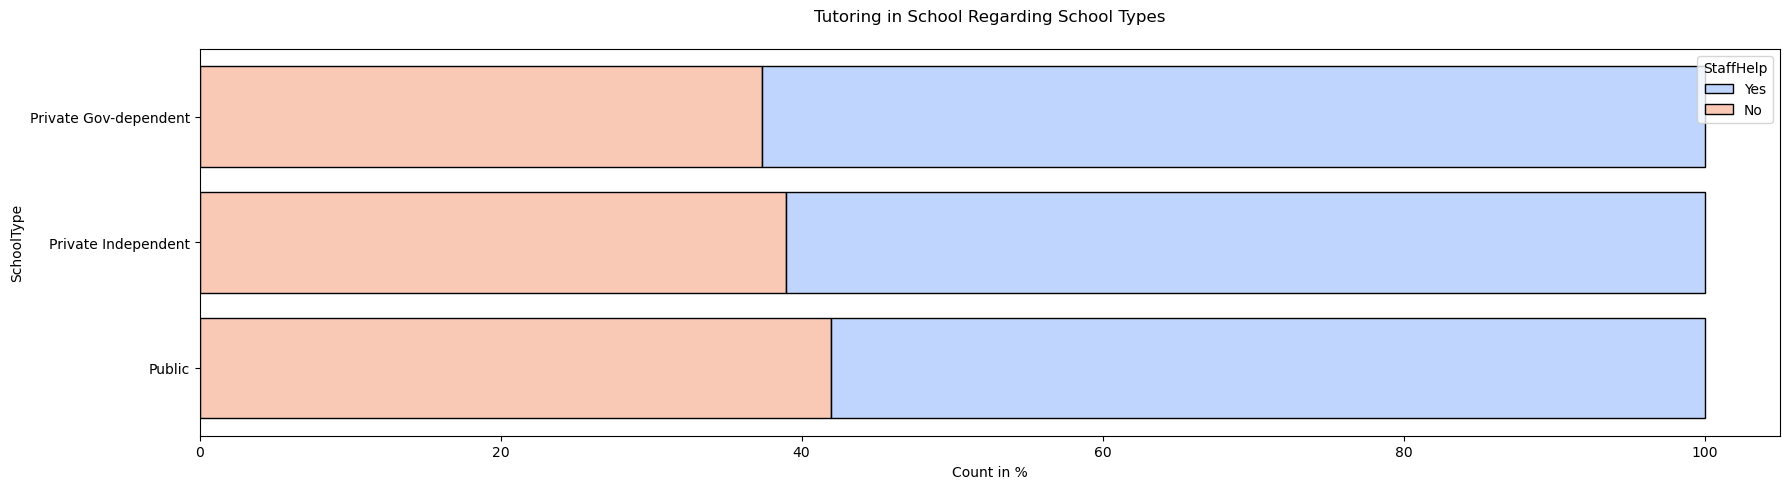

In [60]:
# Visualize tutoring regarding school types

plt.style.use('default')
plt.figure(figsize = (18, 5))
plt.tight_layout()
plot = schooltype_tutoring.groupby('SchoolType')['StaffHelp'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='SchoolType', hue ='StaffHelp', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Tutoring in School Regarding School Types',pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('tutoring_schooltype.png', dpi = 300)

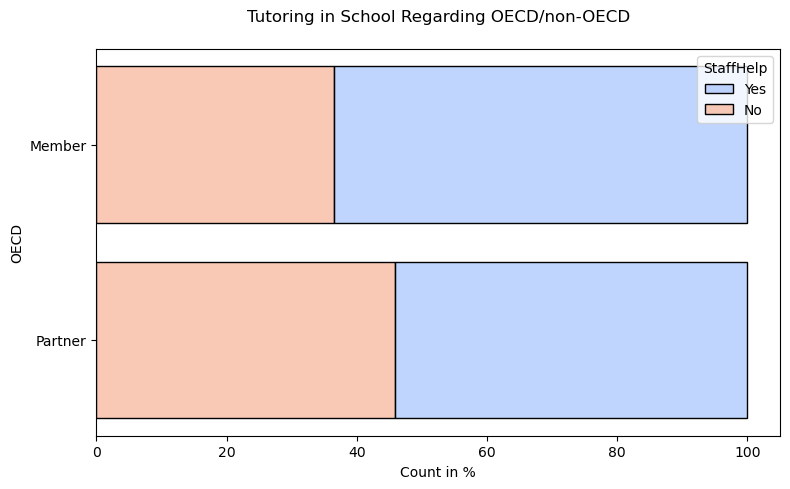

In [61]:
# Visualize tutoring regarding OECD/non-OECD

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = tutoring_nomissing.groupby('OECD')['StaffHelp'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='OECD', hue ='StaffHelp', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Tutoring in School Regarding OECD/non-OECD', pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('tutoring_oecd.png', dpi = 300)

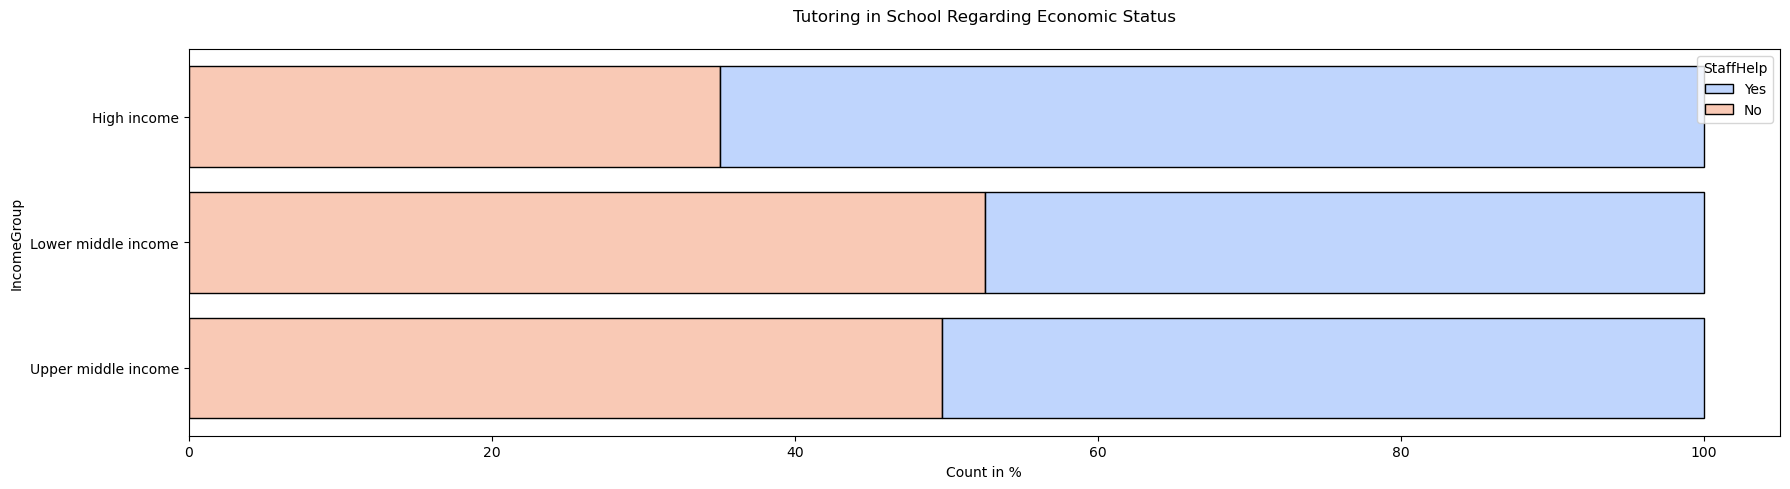

In [62]:
# Visualize tutoring regarding income

plt.style.use('default')
plt.figure(figsize = (18, 5))
plt.tight_layout()
plot = tutoring_nomissing.groupby('IncomeGroup')['StaffHelp'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='IncomeGroup', hue ='StaffHelp', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Tutoring in School Regarding Economic Status',pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('tutoring_income.png', dpi = 300)

Text(0.5, 0, 'Count in %')

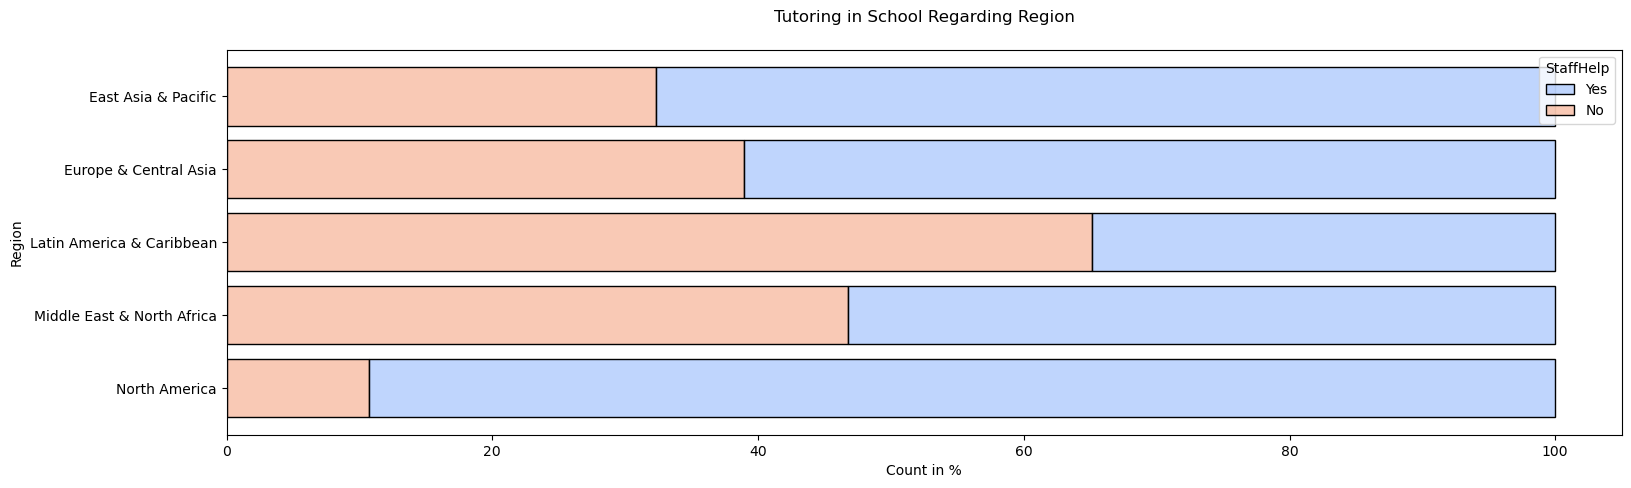

In [63]:
# Visualize tutoring regarding regions

plt.style.use('default')
plt.figure(figsize = (18, 5))
plt.tight_layout()
plot = tutoring_nomissing.groupby('Region')['StaffHelp'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='Region', hue ='StaffHelp', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Tutoring in School Regarding Region',pad = 20)
plt.xlabel('Count in %')
#plt.savefig('tutoring_region.png', dpi = 300)

#### Study room availability

In [64]:
studyroom_nomissing = schools_info.drop(schools_info[(schools_info.StudyRoom == 'Missing')].index).reset_index()

Text(0, 0.5, '')

<Figure size 800x500 with 0 Axes>

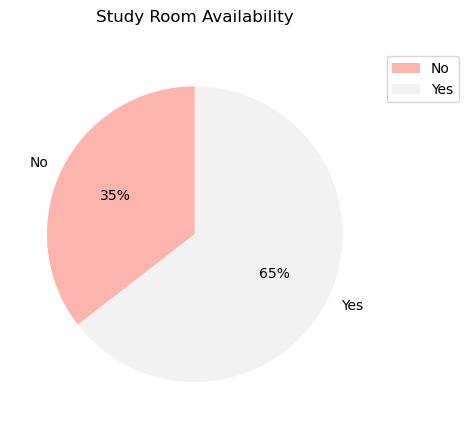

In [65]:
# Visualize study room among all schools

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
df = studyroom_nomissing.groupby('StudyRoom').CNTSCHID.count().reset_index()
df.plot.pie(y ='CNTSCHID', startangle = 90, labels = ['No', 'Yes'], autopct = '%1.0f%%', colormap = 'Pastel1')
plt.title('Study Room Availability',pad = 20)
plt.legend(loc = 'best', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
#plt.savefig('studyroom.png', dpi = 300)

In [66]:
# Visualize study room in all countries

#plt.style.use('default')
#plt.figure(figsize = (20, 35), dpi = 300)
#plt.tight_layout()
#plot = studyroom_nomissing.groupby('Country')['StudyRoom'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
#g = sns.histplot(y='Country', hue ='StudyRoom', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8, hue_order = ['Yes', 'No']) 
#plt.setp(g.get_legend().get_texts(), fontsize ='12')
#plt.setp(g.get_legend().get_title(), fontsize='15')
#plt.xlabel('Count in %')
#plt.title('Study Room',pad = 20)
#plt.savefig('studyroom.png', dpi = 300)

Text(0.5, 0, 'Count in %')

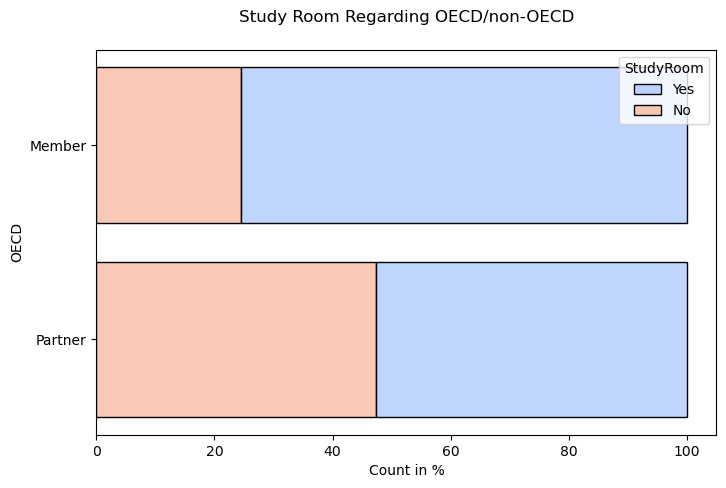

In [67]:
# Visualize study room regarding OECD/non-OECD

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = studyroom_nomissing.groupby('OECD')['StudyRoom'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='OECD', hue ='StudyRoom', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Study Room Regarding OECD/non-OECD',pad = 20)
plt.xlabel('Count in %')
#plt.savefig('studyroom_oecd.png', dpi = 300)

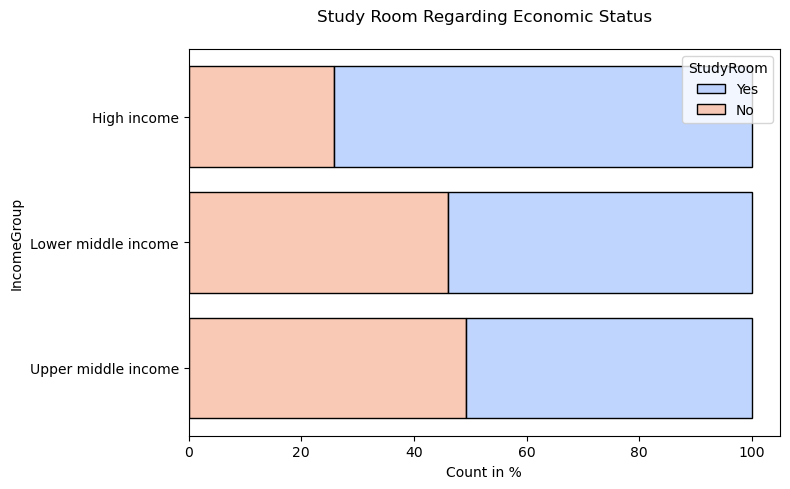

In [68]:
# Visualize study room regarding income

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = studyroom_nomissing.groupby('IncomeGroup')['StudyRoom'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='IncomeGroup', hue ='StudyRoom', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Study Room Regarding Economic Status',pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('studyroom_income.png', dpi = 300)

In [69]:
studyroom_city = schools_info.drop(schools_info[(schools_info.StudyRoom == 'Missing') | (schools_info.CitySize =='Missing')].index).reset_index()

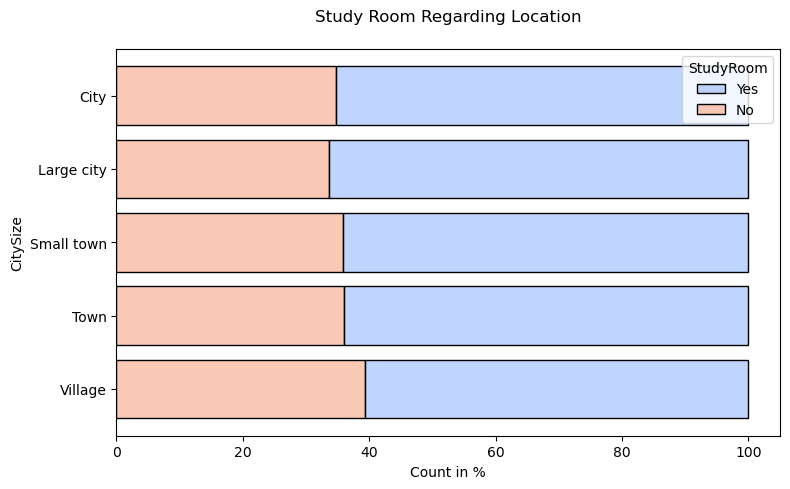

In [70]:
# Visualize study room regarding city sizes

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = studyroom_city.groupby('CitySize')['StudyRoom'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='CitySize', hue ='StudyRoom', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Study Room Regarding Location',pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('studyroom_citysize.png', dpi =300)

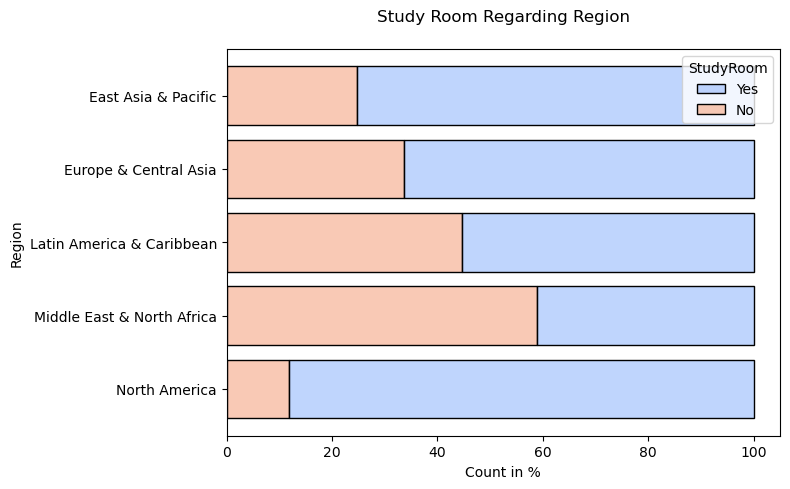

In [71]:
# Visualize study room regarding regions

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = studyroom_nomissing.groupby('Region')['StudyRoom'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='Region', hue ='StudyRoom', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Study Room Regarding Region',pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('studyroom_region.png', dpi = 300)

In [72]:
studyroom_schooltype_nomissing = schools_info.drop(schools_info[(schools_info.StudyRoom == 'Missing') | (schools_info.SchoolType =='Missing')].index).reset_index()

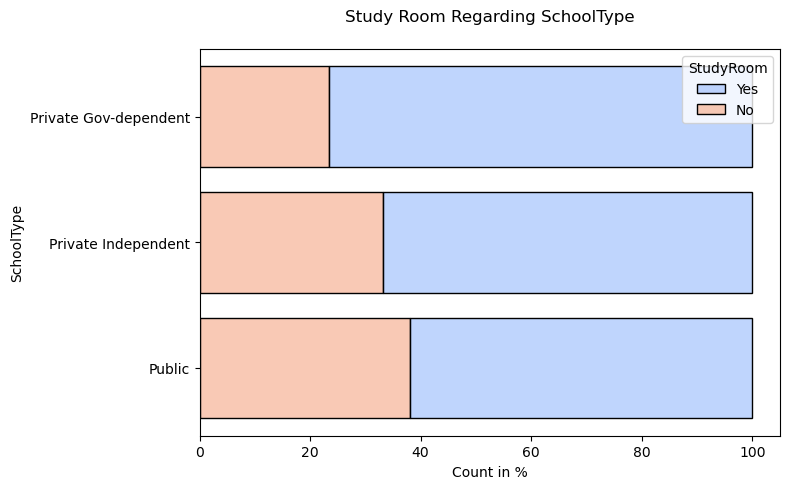

In [73]:
# Visualize studyroom regarding school types

plt.style.use('default')
plt.figure(figsize = (8, 5))
plt.tight_layout()
plot = studyroom_schooltype_nomissing.groupby('SchoolType')['StudyRoom'].value_counts(normalize=True).mul(100).reset_index(name ='percentage')
sns.histplot(y='SchoolType', hue ='StudyRoom', weights ='percentage', multiple ='stack', data = plot, palette ='coolwarm', element = 'bars', shrink = 0.8)
plt.title('Study Room Regarding SchoolType',pad = 20)
plt.xlabel('Count in %')
plt.tight_layout()
#plt.savefig('studyroom_schooltype.png', dpi = 300)

In [74]:
#sns.pairplot(data = school_types_nomissing, x_vars =['SchoolSize', 'ClassSize'], y_vars = ['ComputerPerStudent'], hue = 'SchoolType')

#### Computer per Student

Text(0.5, 1.0, 'Computer per Student Stats')

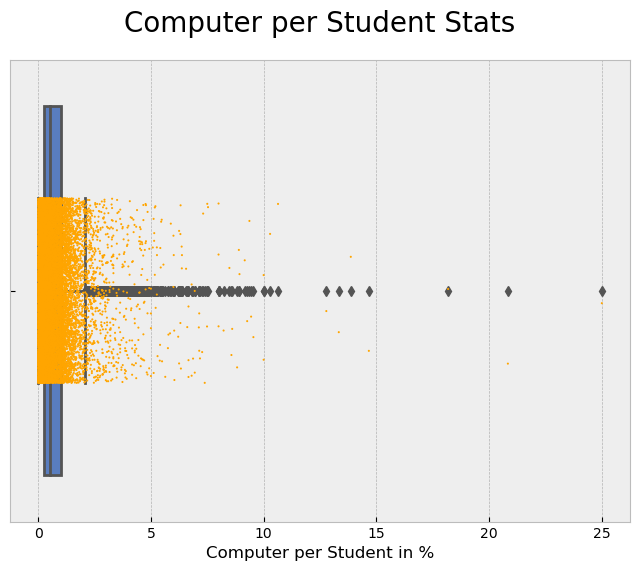

In [75]:
# Visualize general stats of Computer per Student

plt.style.use('bmh')
plt.figure(figsize=(8, 6))
g = sns.boxplot(data = school_types_nomissing, palette ='muted', x = 'ComputerPerStudent')
g = sns.stripplot(data= school_types_nomissing, color="orange", jitter= 0.2, size= 1.5, x = 'ComputerPerStudent')
plt.xlabel('Computer per Student in %')
plt.title('Computer per Student Stats', pad = 20, fontsize = '20', loc ='center')
#plt.savefig('computer_stats.png', dpi = 300)

<Figure size 1200x800 with 0 Axes>

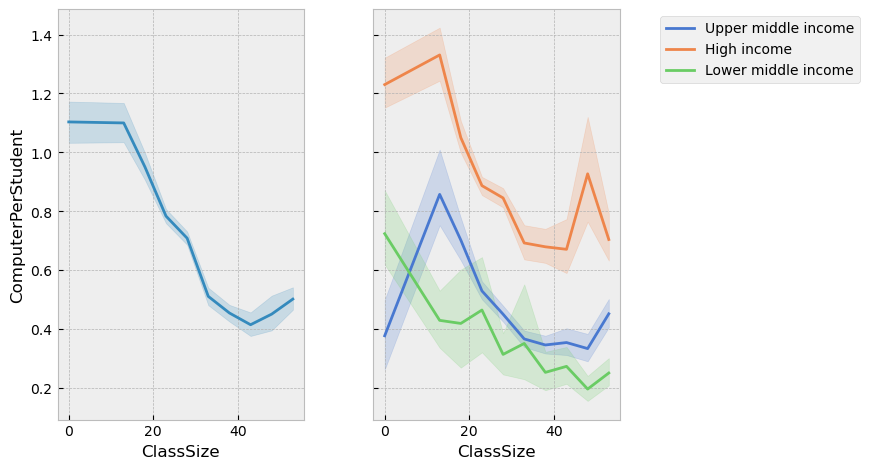

In [76]:
# Visualize CpS regarding school sizes, with category of income

plt.style.use('bmh')
plt.figure(figsize = (12,8))
fig, ax = plt.subplots(1,2, sharey = True, sharex = True)
plt.GridSpec(nrows = 1, ncols = 2, wspace = 10)
sns.lineplot(data = school_types_nomissing, x = 'ClassSize', y ='ComputerPerStudent', ax = ax[0])
sns.lineplot(data = school_types_nomissing, x = 'ClassSize', y ='ComputerPerStudent', hue = 'IncomeGroup', ax = ax[1], legend = 'auto', palette = 'muted' )
plt.ylabel('Computer per Student in %', fontsize = 10)
plt.tight_layout(w_pad = 5)
plt.legend(bbox_to_anchor=(2, 1))
#plt.savefig('cps_class_income.png', dpi = 300)

In [77]:
citysize_schooltype_nomissing = schools_info.drop(schools_info[(schools_info.CitySize == 'Missing') | (schools_info.SchoolType =='Missing')].index).reset_index()

<Figure size 1200x800 with 0 Axes>

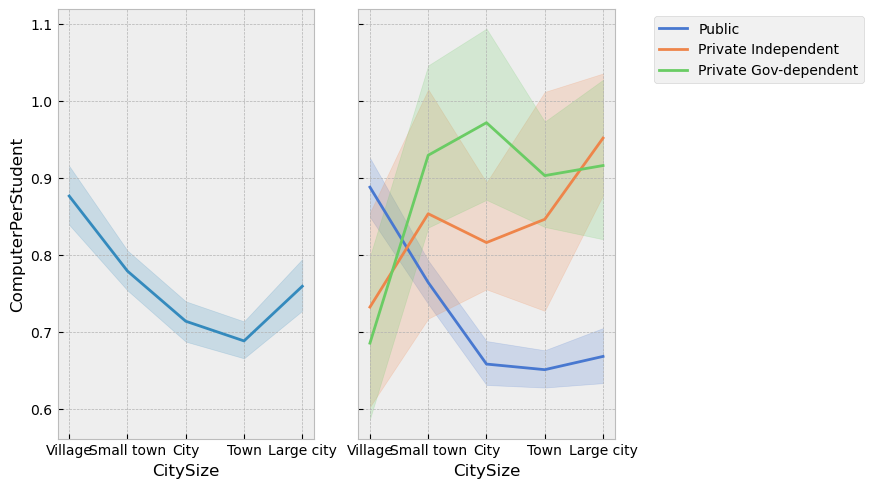

In [78]:
# Visualize CpS regarding city sizes, with category of school types

plt.style.use('bmh')
plt.figure(figsize = (12,8))
fig, ax = plt.subplots(1,2, sharey = True, sharex = True)
plt.GridSpec(nrows = 1, ncols = 2)
sns.lineplot(data = citysize_schooltype_nomissing, x ='CitySize',y ='ComputerPerStudent', ax = ax[0])
sns.lineplot(data = citysize_schooltype_nomissing, x ='CitySize',y ='ComputerPerStudent', hue = 'SchoolType', ax = ax[1],palette = 'muted' )
plt.ylabel('Computer per Student in %', fontsize = 10)
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 1.0)
plt.legend(bbox_to_anchor=(2, 1))
#plt.savefig('cps_citysize_schooltype.png', dpi = 300)

## Can we summary the comparison of students' performance in PISA 2018, for instance, their credits in mathematics?

In [79]:
X = oecd_ranking[['OECD', 'Region', 'IncomeGroup']]
X = pd.get_dummies(data = X, drop_first = True)
X.head()

,OECD_Partner,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income
0,1,1,0,0,0,0,1
1,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1


In [80]:
Y = oecd_ranking[['Mathematics']]

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46, 7)
(32, 7)
(46, 1)
(32, 1)


In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)

[508.02575866]


In [83]:
coeff_parameter = pd.DataFrame(model.coef_[0],X.columns,columns=['Coefficient']).sort_values(by ='Coefficient', ascending = False)
coeff_parameter

,Coefficient
Region_North America,3.994241
OECD_Partner,-10.344692
Region_Europe & Central Asia,-10.551668
Region_Middle East & North Africa,-54.138279
IncomeGroup_Upper middle income,-54.872551
Region_Latin America & Caribbean,-67.645505
IncomeGroup_Lower middle income,-93.486080


In [84]:
predictions = model.predict(X_test)
predictions

array([[497.47409043],
       [497.47409043],
       [497.47409043],
       [497.47409043],
       [497.68106692],
       [497.47409043],
       [497.47409043],
       [497.47409043],
       [432.25684773],
       [497.47409043],
       [432.25684773],
       [508.02575866],
       [432.25684773],
       [443.54278787],
       [375.16301093],
       [442.80851596],
       [375.16301093],
       [443.54278787],
       [442.80851596],
       [442.80851596],
       [385.50770266],
       [497.47409043],
       [432.25684773],
       [487.12939869],
       [508.02575866],
       [497.47409043],
       [497.47409043],
       [508.02575866],
       [497.47409043],
       [388.6702369 ],
       [512.02      ],
       [430.03556189]])

<AxesSubplot:xlabel='Mathematics'>

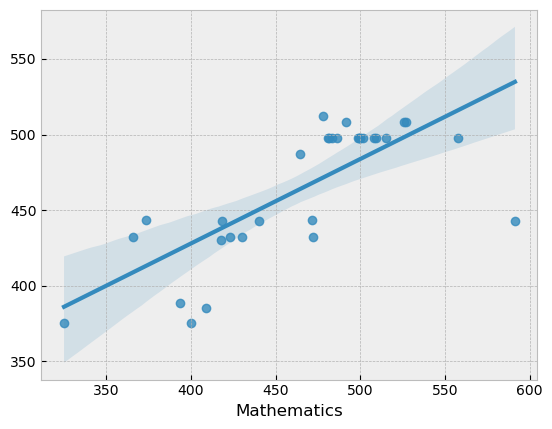

In [85]:
plt.style.use('bmh')
sns.regplot(y_test,predictions)

In [86]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:            Mathematics   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     14.77
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           4.07e-09
Time:                        17:04:28   Log-Likelihood:                -218.97
No. Observations:                  46   AIC:                             453.9
Df Residuals:                      38   BIC:                             468.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

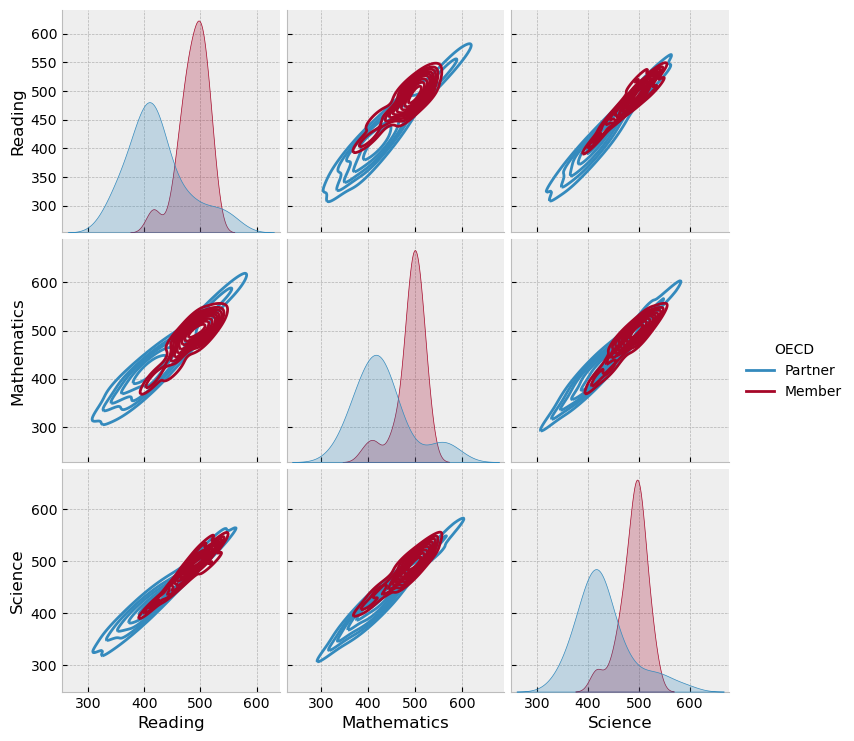

In [87]:
sns.pairplot(oecd_ranking, hue ='OECD', kind ='kde')

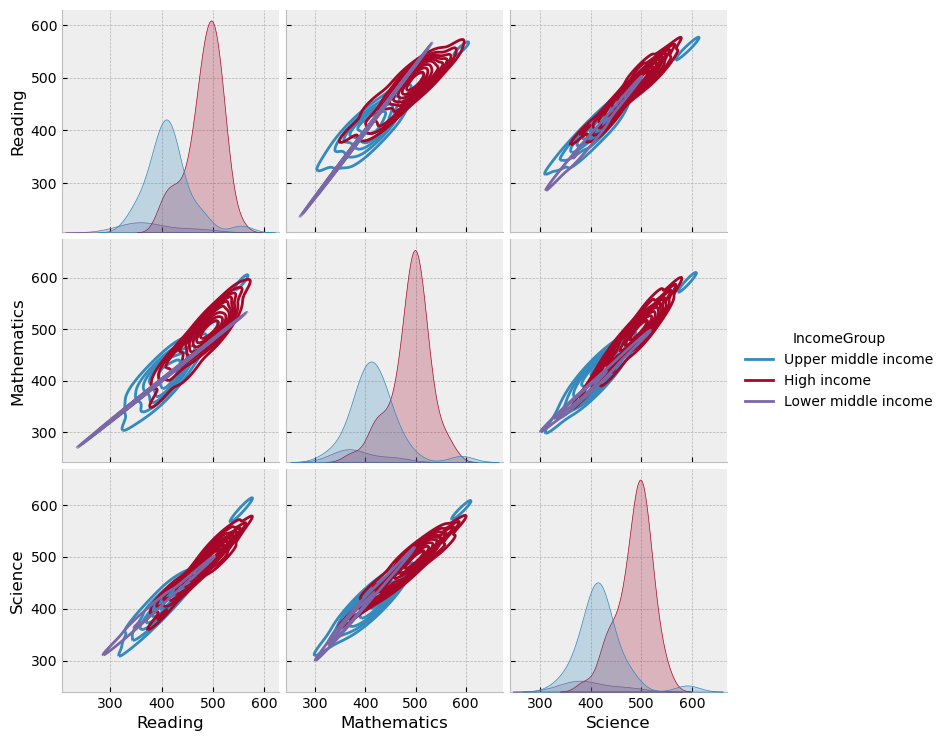

In [88]:
sns.pairplot(oecd_ranking, hue ='IncomeGroup', kind ='kde')